In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
pd.__version__

'2.1.1'

In [3]:
!python --version

Python 3.11.4


In [4]:
hv = pd.read_csv('ETHDataset.csv', low_memory = False)
hv

,Strike Price,Call/Put,Asset Price,Time to Expiry,Last,Size,IV (Bid),Bid,IV,Mark,...,Delta,Gamma,Vega,Theta,Rho,Volume,HV,HV60,Time(in days),GarchVol
0,1300,0,1197.51,0.492200,0.157,99,68.11,0.157,69.93,0.1619,...,0.53040,0.00068,3.34242,-0.6476,2.17641,1,87.02,90.31,180,28.102002
1,1300,1,1197.51,0.492200,0.248,1,-,0.0485,69.93,0.2475,...,-0.46960,0.00068,3.34242,-0.6476,-4.22367,-,87.02,90.31,180,28.102002
2,2000,1,1197.51,0.492200,0.68,10,-,0.5,69.40,0.7173,...,-0.79094,0.00049,2.41524,-0.46642,-8.88751,-,87.02,90.31,180,28.102002
3,600,1,1197.51,0.492200,0.037,149,89.5,0.0295,93.44,0.0344,...,-0.08350,0.0002,1.29017,-0.33545,-0.69073,-,87.02,90.31,180,28.102002
4,4000,0,1197.51,0.492200,0.0105,149,86.64,0.0095,90.12,0.0128,...,0.05580,0.00015,0.94544,-0.23708,0.25787,-,87.02,90.31,180,28.102002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87127,400,1,1192.90,0.993373,0.0315,2,89.77,0.026,94.07,0.0311,...,-0.05110,9.00E-05,1.24785,-0.16185,-0.96571,-,88.05,90.70,363,28.092461
87128,3000,0,1192.90,0.993373,0.04,100,65.24,0.035,67.90,0.0417,...,0.15289,0.00029,2.80789,-0.26289,1.32569,99,88.05,90.70,363,28.092461
87129,1200,1,1192.90,0.993373,0.294,44,66.8,0.2645,75.39,0.2974,...,-0.35647,0.00042,4.43334,-0.46085,-7.74131,-,88.05,90.70,363,28.092461
87130,2000,0,1192.90,0.993373,0.1169,88,62.81,0.0905,66.43,0.1040,...,0.32664,0.00046,4.28845,-0.39283,2.64663,1500,88.05,90.70,363,28.092461


In [5]:
hv = hv.loc[(hv['Mark'] != '-') & (hv['Asset Price']/hv['Strike Price']>=0.3) & (hv['Asset Price']/hv['Strike Price']<=1.7)]
hv

,Strike Price,Call/Put,Asset Price,Time to Expiry,Last,Size,IV (Bid),Bid,IV,Mark,...,Delta,Gamma,Vega,Theta,Rho,Volume,HV,HV60,Time(in days),GarchVol
0,1300,0,1197.51,0.492200,0.157,99,68.11,0.157,69.93,0.1619,...,0.53040,0.00068,3.34242,-0.6476,2.17641,1,87.02,90.31,180,28.102002
1,1300,1,1197.51,0.492200,0.248,1,-,0.0485,69.93,0.2475,...,-0.46960,0.00068,3.34242,-0.6476,-4.22367,-,87.02,90.31,180,28.102002
2,2000,1,1197.51,0.492200,0.68,10,-,0.5,69.40,0.7173,...,-0.79094,0.00049,2.41524,-0.46642,-8.88751,-,87.02,90.31,180,28.102002
5,2500,1,1197.51,0.492200,1.097,1,-,1.055,74.94,1.1155,...,-0.87218,0.00033,1.75676,-0.36633,-11.71467,-,87.02,90.31,180,28.102002
7,2200,0,1197.51,0.492200,0.036,149,68.63,0.0315,70.79,0.0359,...,0.16449,0.00042,2.08162,-0.41,0.76246,-,87.02,90.31,180,28.102002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87126,2500,0,1192.90,0.993373,0.0605,98,61.67,0.048,66.43,0.0620,...,0.21587,0.00037,3.48255,-0.31901,1.83187,264,88.05,90.70,363,28.092461
87128,3000,0,1192.90,0.993373,0.04,100,65.24,0.035,67.90,0.0417,...,0.15289,0.00029,2.80789,-0.26289,1.32569,99,88.05,90.70,363,28.092461
87129,1200,1,1192.90,0.993373,0.294,44,66.8,0.2645,75.39,0.2974,...,-0.35647,0.00042,4.43334,-0.46085,-7.74131,-,88.05,90.70,363,28.092461
87130,2000,0,1192.90,0.993373,0.1169,88,62.81,0.0905,66.43,0.1040,...,0.32664,0.00046,4.28845,-0.39283,2.64663,1500,88.05,90.70,363,28.092461


In [6]:
hv['HV60'] = hv['HV60']/100
hv['GarchVol'] = hv['GarchVol']/100
hv['IV'] = hv['IV']/100

C:\Users\HP\AppData\Local\Temp\ipykernel_43640\1047911177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv['HV60'] = hv['HV60']/100
C:\Users\HP\AppData\Local\Temp\ipykernel_43640\1047911177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv['GarchVol'] = hv['GarchVol']/100
C:\Users\HP\AppData\Local\Temp\ipykernel_43640\1047911177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [7]:
hv = hv.astype({'IV':float, 'Asset Price': float, 'Strike Price' : float, 'Time to Expiry' : float, 'Call/Put' : int, 'HV' : float, 'HV60': float, 'Mark' : float, 'GarchVol' : float})

In [8]:
hv.reset_index()

,index,Strike Price,Call/Put,Asset Price,Time to Expiry,Last,Size,IV (Bid),Bid,IV,...,Delta,Gamma,Vega,Theta,Rho,Volume,HV,HV60,Time(in days),GarchVol
0,0,1300.0,0,1197.51,0.492200,0.157,99,68.11,0.157,0.6993,...,0.53040,0.00068,3.34242,-0.6476,2.17641,1,87.02,0.9031,180,0.281020
1,1,1300.0,1,1197.51,0.492200,0.248,1,-,0.0485,0.6993,...,-0.46960,0.00068,3.34242,-0.6476,-4.22367,-,87.02,0.9031,180,0.281020
2,2,2000.0,1,1197.51,0.492200,0.68,10,-,0.5,0.6940,...,-0.79094,0.00049,2.41524,-0.46642,-8.88751,-,87.02,0.9031,180,0.281020
3,5,2500.0,1,1197.51,0.492200,1.097,1,-,1.055,0.7494,...,-0.87218,0.00033,1.75676,-0.36633,-11.71467,-,87.02,0.9031,180,0.281020
4,7,2200.0,0,1197.51,0.492200,0.036,149,68.63,0.0315,0.7079,...,0.16449,0.00042,2.08162,-0.41,0.76246,-,87.02,0.9031,180,0.281020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73221,87126,2500.0,0,1192.90,0.993373,0.0605,98,61.67,0.048,0.6643,...,0.21587,0.00037,3.48255,-0.31901,1.83187,264,88.05,0.9070,363,0.280925
73222,87128,3000.0,0,1192.90,0.993373,0.04,100,65.24,0.035,0.6790,...,0.15289,0.00029,2.80789,-0.26289,1.32569,99,88.05,0.9070,363,0.280925
73223,87129,1200.0,1,1192.90,0.993373,0.294,44,66.8,0.2645,0.7539,...,-0.35647,0.00042,4.43334,-0.46085,-7.74131,-,88.05,0.9070,363,0.280925
73224,87130,2000.0,0,1192.90,0.993373,0.1169,88,62.81,0.0905,0.6643,...,0.32664,0.00046,4.28845,-0.39283,2.64663,1500,88.05,0.9070,363,0.280925


In [9]:
hv

,Strike Price,Call/Put,Asset Price,Time to Expiry,Last,Size,IV (Bid),Bid,IV,Mark,...,Delta,Gamma,Vega,Theta,Rho,Volume,HV,HV60,Time(in days),GarchVol
0,1300.0,0,1197.51,0.492200,0.157,99,68.11,0.157,0.6993,0.1619,...,0.53040,0.00068,3.34242,-0.6476,2.17641,1,87.02,0.9031,180,0.281020
1,1300.0,1,1197.51,0.492200,0.248,1,-,0.0485,0.6993,0.2475,...,-0.46960,0.00068,3.34242,-0.6476,-4.22367,-,87.02,0.9031,180,0.281020
2,2000.0,1,1197.51,0.492200,0.68,10,-,0.5,0.6940,0.7173,...,-0.79094,0.00049,2.41524,-0.46642,-8.88751,-,87.02,0.9031,180,0.281020
5,2500.0,1,1197.51,0.492200,1.097,1,-,1.055,0.7494,1.1155,...,-0.87218,0.00033,1.75676,-0.36633,-11.71467,-,87.02,0.9031,180,0.281020
7,2200.0,0,1197.51,0.492200,0.036,149,68.63,0.0315,0.7079,0.0359,...,0.16449,0.00042,2.08162,-0.41,0.76246,-,87.02,0.9031,180,0.281020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87126,2500.0,0,1192.90,0.993373,0.0605,98,61.67,0.048,0.6643,0.0620,...,0.21587,0.00037,3.48255,-0.31901,1.83187,264,88.05,0.9070,363,0.280925
87128,3000.0,0,1192.90,0.993373,0.04,100,65.24,0.035,0.6790,0.0417,...,0.15289,0.00029,2.80789,-0.26289,1.32569,99,88.05,0.9070,363,0.280925
87129,1200.0,1,1192.90,0.993373,0.294,44,66.8,0.2645,0.7539,0.2974,...,-0.35647,0.00042,4.43334,-0.46085,-7.74131,-,88.05,0.9070,363,0.280925
87130,2000.0,0,1192.90,0.993373,0.1169,88,62.81,0.0905,0.6643,0.1040,...,0.32664,0.00046,4.28845,-0.39283,2.64663,1500,88.05,0.9070,363,0.280925


In [10]:
X = hv.iloc[:,[0, 2, 3, 21, 23]].values
Y = hv.iloc[:, 8].values

In [11]:
pd.DataFrame(X).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [765]:
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBRegressor()
parameters = {
              'learning_rate': [0.01, 0.02, .03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], #so called `eta` value
              'max_depth': [5, 6, 7, 8, 9, 10],
              'subsample': [0.6, 0.7, 0.8, 0.9],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits
0.9911439673004944
{'colsample_bytree': 0.8, 'learning_rate': 0.09, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}


In [13]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, max_depth=9, subsample=0.7, colsample_bytree=0.8, learning_rate=0.09)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([0.65333134, 0.7449637 , 0.6485162 , ..., 0.6924051 , 0.99602777,
       0.71245635], dtype=float32)

In [18]:
y_test

array([0.656 , 0.7389, 0.6488, ..., 0.7006, 0.9985, 0.7107])

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

0.0002371503175344137

In [20]:
RMSE = np.sqrt(mse)

In [21]:
RMSE

0.015399685631025515

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.006809140406510519

In [23]:
np.array(y_pred)

array([0.65333134, 0.7449637 , 0.6485162 , ..., 0.6924051 , 0.99602777,
       0.71245635], dtype=float32)

In [24]:
error = y_test - y_pred
error

array([ 0.00266866, -0.00606371,  0.00028382, ...,  0.0081949 ,
        0.00247223, -0.00175635])

In [25]:
!pip install shap


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(np.ascontiguousarray(X_test))
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()

[23:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[23:01:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Importance')

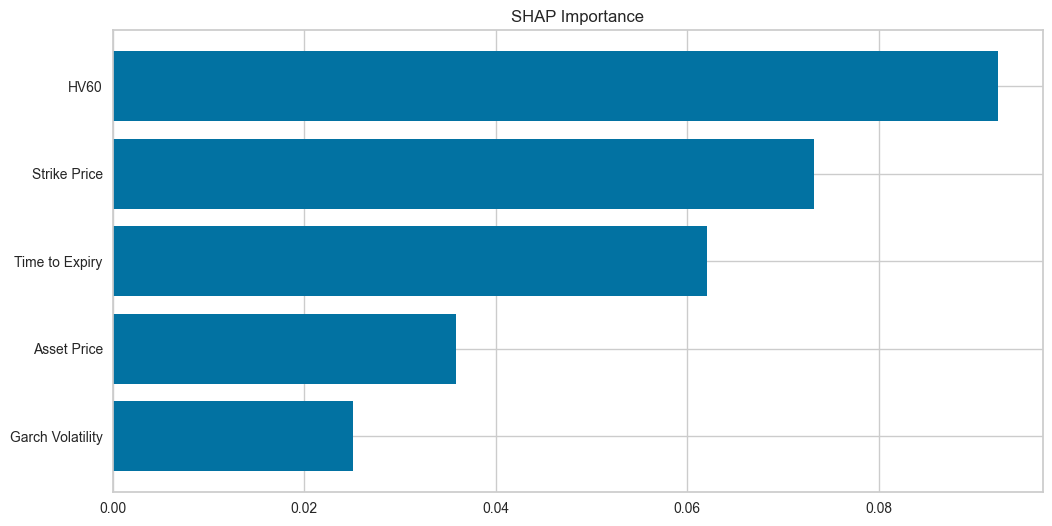

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
x_test = pd.DataFrame(X_test)
x_test.columns = ['Strike Price','Asset Price', 'Time to Expiry', 'HV60', 'Garch Volatility']
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('SHAP Importance')

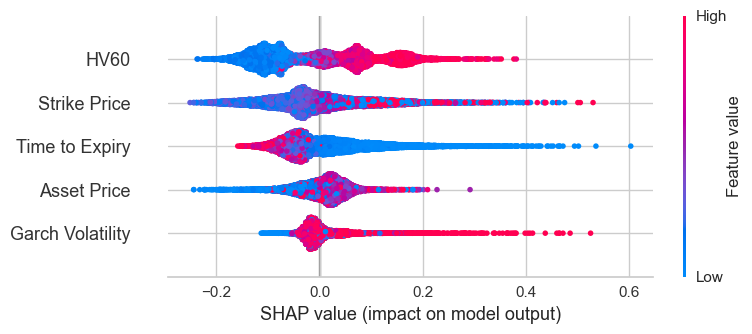

In [28]:
shap.summary_plot(shap_values, x_test)

In [29]:
X_test = pd.DataFrame(X_test)
X_test.columns = ['Asset Price', 'Strike Price', 'Time to Expiry', 'HV60', 'GarchVol']
X_test

,Asset Price,Strike Price,Time to Expiry,HV60,GarchVol
0,1400.0,1871.12,0.188060,0.5761,0.273834
1,6500.0,2102.13,0.957907,0.5599,0.276265
2,1900.0,1698.15,0.900334,0.4970,0.280158
3,1700.0,1185.22,0.174395,0.9134,0.284261
4,1500.0,1543.03,0.002740,0.9983,0.196639
...,...,...,...,...,...
14641,1800.0,1620.34,0.038356,0.9915,0.247589
14642,1300.0,1281.00,0.053759,0.9374,0.256379
14643,1550.0,1535.27,0.037458,0.6753,0.254605
14644,1900.0,1520.83,0.232877,1.0094,0.286244


In [30]:
shortTerm = X_test[X_test['Time to Expiry'] < 90/365]
shortTerm

,Asset Price,Strike Price,Time to Expiry,HV60,GarchVol
0,1400.0,1871.12,0.188060,0.5761,0.273834
3,1700.0,1185.22,0.174395,0.9134,0.284261
4,1500.0,1543.03,0.002740,0.9983,0.196639
7,1500.0,1543.58,0.002740,1.0099,0.267028
8,1750.0,1707.55,0.032877,0.9719,0.242259
...,...,...,...,...,...
14640,4000.0,1526.76,0.171674,0.6753,0.281190
14641,1800.0,1620.34,0.038356,0.9915,0.247589
14642,1300.0,1281.00,0.053759,0.9374,0.256379
14643,1550.0,1535.27,0.037458,0.6753,0.254605


In [31]:
medTerm = X_test[(X_test['Time to Expiry'] >= 90/365) & (X_test['Time to Expiry'] <= 270/365)]
medTerm

,Asset Price,Strike Price,Time to Expiry,HV60,GarchVol
5,2500.0,1607.20,0.618126,0.5026,0.279317
6,2200.0,1636.20,0.587734,0.5137,0.278364
9,1300.0,1653.36,0.335055,0.5142,0.278290
13,3200.0,1268.54,0.453619,0.7845,0.281924
14,2200.0,1868.78,0.722110,0.5691,0.276029
...,...,...,...,...,...
14624,2500.0,1747.73,0.298630,0.9595,0.283640
14626,2600.0,1259.09,0.319458,0.9307,0.282872
14631,1800.0,1879.87,0.658970,0.5547,0.274769
14638,3500.0,2095.29,0.451162,0.5290,0.276105


In [32]:
longTerm = X_test[(X_test['Time to Expiry'] > 270/365)]
longTerm

,Asset Price,Strike Price,Time to Expiry,HV60,GarchVol
1,6500.0,2102.13,0.957907,0.5599,0.276265
2,1900.0,1698.15,0.900334,0.4970,0.280158
23,700.0,1183.25,0.842562,0.9095,0.284224
27,2200.0,1636.60,0.897348,0.7000,0.281426
52,1200.0,1835.06,0.752255,0.5990,0.276461
...,...,...,...,...,...
14590,2500.0,1555.05,0.944058,0.5129,0.281482
14598,2000.0,1189.57,0.845501,0.9134,0.284583
14612,2200.0,1830.27,0.741293,0.5710,0.275953
14628,2000.0,1282.91,0.947071,0.7139,0.282020


In [33]:
import math
st_pred = model.predict(shortTerm)

mse = mean_squared_error(y_test[shortTerm.index],st_pred)
print("RMSE: %.8f" % math.sqrt(mse))
mae = mean_absolute_error(y_test[shortTerm.index],st_pred)
print("MAE: %.8f" % mae)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


RMSE: 0.01878817
MAE: 0.00890632


In [34]:
import math
mt_pred = model.predict(medTerm)

mse = mean_squared_error(y_test[medTerm.index],mt_pred)
print("RMSE: %.8f" % math.sqrt(mse))
mae = mean_absolute_error(y_test[medTerm.index],mt_pred)
print("MAE: %.8f" % mae)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


RMSE: 0.00396377
MAE: 0.00275970


In [35]:
import math
lt_pred = model.predict(longTerm)

mse = mean_squared_error(y_test[longTerm.index],lt_pred)
print("RMSE: %.8f" % math.sqrt(mse))
mae = mean_absolute_error(y_test[longTerm.index],lt_pred)
print("MAE: %.8f" % mae)

RMSE: 0.00477731
MAE: 0.00303487


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [36]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


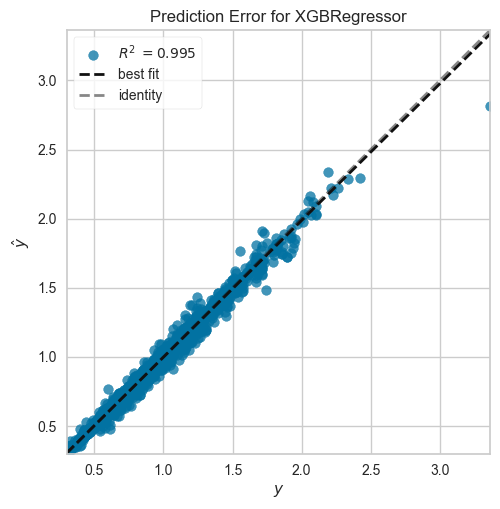

In [37]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

In [38]:
iv_new = model.predict(X)
iv_new

array([0.70184255, 0.70184255, 0.6929515 , ..., 0.7478849 , 0.67103636,
       0.6967331 ], dtype=float32)

In [39]:
Y

array([0.6993, 0.6993, 0.694 , ..., 0.7539, 0.6643, 0.6965])

In [40]:
error = iv_new - Y
error

array([ 0.00254255,  0.00254255, -0.0010485 , ..., -0.00601507,
        0.00673636,  0.00023312])

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(iv_new,Y)
mse

6.024378398805349e-05

In [42]:
rmse = np.sqrt(mse)
rmse

0.007761686929273397

In [43]:
mae = mean_absolute_error(iv_new,Y)
mae

0.003639760259057805

In [44]:
data = pd.DataFrame()

In [45]:
data['GIV'] = iv_new

In [46]:
cols = hv.iloc[:,[0, 1, 2, 3, 9]].values
cols

array([[1.30000000e+03, 0.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        1.61900000e-01],
       [1.30000000e+03, 1.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        2.47500000e-01],
       [2.00000000e+03, 1.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        7.17300000e-01],
       ...,
       [1.20000000e+03, 1.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        2.97400000e-01],
       [2.00000000e+03, 0.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        1.04000000e-01],
       [3.50000000e+03, 0.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        3.04000000e-02]])

In [47]:
data

,GIV
0,0.701843
1,0.701843
2,0.692952
3,0.744495
4,0.711728
...,...
73221,0.672130
73222,0.679160
73223,0.747885
73224,0.671036


In [48]:
newD = data.to_numpy()
newD

array([[0.70184255],
       [0.70184255],
       [0.6929515 ],
       ...,
       [0.7478849 ],
       [0.67103636],
       [0.6967331 ]], dtype=float32)

In [49]:
newD.shape

(73226, 1)

In [50]:
cols.shape

(73226, 5)

In [51]:
nD = np.hstack((cols, newD))
nD

array([[1.30000000e+03, 0.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        1.61900000e-01, 7.01842546e-01],
       [1.30000000e+03, 1.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        2.47500000e-01, 7.01842546e-01],
       [2.00000000e+03, 1.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        7.17300000e-01, 6.92951500e-01],
       ...,
       [1.20000000e+03, 1.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        2.97400000e-01, 7.47884929e-01],
       [2.00000000e+03, 0.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        1.04000000e-01, 6.71036363e-01],
       [3.50000000e+03, 0.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        3.04000000e-02, 6.96733117e-01]])

In [52]:
hv = pd.DataFrame(nD)
hv

,0,1,2,3,4,5
0,1300.0,0.0,1197.51,0.492200,0.1619,0.701843
1,1300.0,1.0,1197.51,0.492200,0.2475,0.701843
2,2000.0,1.0,1197.51,0.492200,0.7173,0.692952
3,2500.0,1.0,1197.51,0.492200,1.1155,0.744495
4,2200.0,0.0,1197.51,0.492200,0.0359,0.711728
...,...,...,...,...,...,...
73221,2500.0,0.0,1192.90,0.993373,0.0620,0.672130
73222,3000.0,0.0,1192.90,0.993373,0.0417,0.679160
73223,1200.0,1.0,1192.90,0.993373,0.2974,0.747885
73224,2000.0,0.0,1192.90,0.993373,0.1040,0.671036


In [53]:
hv.columns = ['Strike Price', 'Call/Put', 'Asset Price', 'Time', 'Mark', 'GIV']

In [54]:
hv

,Strike Price,Call/Put,Asset Price,Time,Mark,GIV
0,1300.0,0.0,1197.51,0.492200,0.1619,0.701843
1,1300.0,1.0,1197.51,0.492200,0.2475,0.701843
2,2000.0,1.0,1197.51,0.492200,0.7173,0.692952
3,2500.0,1.0,1197.51,0.492200,1.1155,0.744495
4,2200.0,0.0,1197.51,0.492200,0.0359,0.711728
...,...,...,...,...,...,...
73221,2500.0,0.0,1192.90,0.993373,0.0620,0.672130
73222,3000.0,0.0,1192.90,0.993373,0.0417,0.679160
73223,1200.0,1.0,1192.90,0.993373,0.2974,0.747885
73224,2000.0,0.0,1192.90,0.993373,0.1040,0.671036


In [55]:
hv.isnull().sum()

Strike Price    0
Call/Put        0
Asset Price     0
Time            0
Mark            0
GIV             0
dtype: int64

In [56]:
hv.to_csv('DatawithIV.csv')

In [57]:
X_op = hv.iloc[:,[0, 1, 2, 3, 5]].values
Y_op = hv.iloc[:, 4].values

In [58]:
Y_op = Y_op*X_op[:,2]

In [59]:
X_op

array([[1.30000000e+03, 0.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        7.01842546e-01],
       [1.30000000e+03, 1.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        7.01842546e-01],
       [2.00000000e+03, 1.00000000e+00, 1.19751000e+03, 4.92200000e-01,
        6.92951500e-01],
       ...,
       [1.20000000e+03, 1.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        7.47884929e-01],
       [2.00000000e+03, 0.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        6.71036363e-01],
       [3.50000000e+03, 0.00000000e+00, 1.19290000e+03, 9.93372603e-01,
        6.96733117e-01]])

In [60]:
Y_op

array([193.876869, 296.383725, 858.973923, ..., 354.76846 , 124.0616  ,
        36.26416 ])

In [61]:
from sklearn.model_selection import train_test_split
X_train_op, X_test_op, y_train_op, y_test_op = train_test_split(X_op, Y_op, test_size=0.2, random_state=42)

In [62]:
from sklearn.model_selection import train_test_split
X_train_set_op, X_val_op, y_train_set_op, y_val_op = train_test_split(X_train_op, y_train_op, test_size=0.125, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler

def scale_datasets(x_train, x_test, x_val):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns)
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns)
    x_val_scaled = pd.DataFrame(
      standard_scaler.transform(x_val),
      columns = x_val.columns)
    return x_train_scaled, x_test_scaled, x_val_scaled

In [64]:
x_train_scaled, x_test_scaled, x_val_scaled = scale_datasets(pd.DataFrame(X_train_set_op), pd.DataFrame(X_test_op), pd.DataFrame(X_val_op))
x_train_scaled = x_train_scaled.to_numpy()
x_test_scaled = x_test_scaled.to_numpy()
x_val_scaled = x_val_scaled.to_numpy()

x_train_scaled = x_train_scaled.reshape(x_train_scaled.shape[0], x_train_scaled.shape[1], 1)
x_test_scaled = x_test_scaled.reshape(x_test_scaled.shape[0], x_test_scaled.shape[1], 1)
x_val_scaled = x_val_scaled.reshape(x_val_scaled.shape[0], x_val_scaled.shape[1], 1)

In [184]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, BatchNormalization, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model2 = Sequential()
model2.add(Conv1D(256, 4, kernel_initializer = 'glorot_uniform', activation="relu", input_shape=(5,1)))
model2.add(Conv1D(128, 2, activation="relu"))
model2.add(Conv1D(64, 1, activation="relu"))
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(loss="mse", optimizer="nadam")
model2.summary()
model2.fit(x_train_scaled, y_train_set_op, validation_data = [x_val_scaled, y_val_op], batch_size=64,epochs=250, verbose=1)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 2, 256)            1280      
                                                                 
 conv1d_45 (Conv1D)          (None, 1, 128)            65664     
                                                                 
 conv1d_46 (Conv1D)          (None, 1, 64)             8256      
                                                                 
 flatten_14 (Flatten)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75265 (294.00 KB)
Trainable params: 75265 (294.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/250
801

In [185]:
import math
ypred = model2.predict(x_test_scaled)
print(model2.evaluate(x_train_scaled, y_train_set_op))
print("MSE: %.4f" % mean_squared_error(y_test_op, ypred.flatten()))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op, ypred.flatten())))

1602/1602 [==============================] - 1s 833us/step - loss: 2.3323
2.332341194152832
MSE: 3.3417
RMSE: 1.8280


In [187]:
print("MAE: %.4f" % mean_absolute_error(y_test_op, ypred.flatten()))

MAE: 1.1234


In [217]:
X_test_op_pd = pd.DataFrame(X_test_op)
X_test_op_pd.columns = ['Asset Price', 'Call/Put', 'Strike Price', 'Time to Expiry', 'GIV']
X_test_op_pd

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
0,1400.0,0.0,1871.12,0.188060,0.653331
1,6500.0,0.0,2102.13,0.957907,0.744964
2,1900.0,1.0,1698.15,0.900334,0.648516
3,1700.0,0.0,1185.22,0.174395,0.769250
4,1500.0,0.0,1543.03,0.002740,1.023884
...,...,...,...,...,...
14641,1800.0,1.0,1620.34,0.038356,1.030444
14642,1300.0,1.0,1281.00,0.053759,0.679308
14643,1550.0,0.0,1535.27,0.037458,0.692405
14644,1900.0,0.0,1520.83,0.232877,0.996028


In [222]:
call_op = X_test_op_pd[X_test_op_pd['Call/Put']==0]
call_op

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
0,1400.0,0.0,1871.12,0.188060,0.653331
1,6500.0,0.0,2102.13,0.957907,0.744964
3,1700.0,0.0,1185.22,0.174395,0.769250
4,1500.0,0.0,1543.03,0.002740,1.023884
9,1300.0,0.0,1653.36,0.335055,0.624932
...,...,...,...,...,...
14637,3600.0,0.0,1900.41,0.226074,0.676582
14639,1750.0,0.0,1702.64,0.057534,1.006601
14643,1550.0,0.0,1535.27,0.037458,0.692405
14644,1900.0,0.0,1520.83,0.232877,0.996028


In [223]:
put_op = X_test_op_pd[X_test_op_pd['Call/Put']==1]
put_op

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
2,1900.0,1.0,1698.15,0.900334,0.648516
5,2500.0,1.0,1607.20,0.618126,0.630085
6,2200.0,1.0,1636.20,0.587734,0.591947
7,1500.0,1.0,1543.58,0.002740,0.935148
8,1750.0,1.0,1707.55,0.032877,1.054663
...,...,...,...,...,...
14635,2600.0,1.0,1589.06,0.199025,0.818526
14638,3500.0,1.0,2095.29,0.451162,0.663464
14640,4000.0,1.0,1526.76,0.171674,0.926115
14641,1800.0,1.0,1620.34,0.038356,1.030444


In [227]:
shortTerm_call = call_op[call_op['Time to Expiry'] < 90/365]
shortTerm_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
0,1400.0,0.0,1871.12,0.188060,0.653331
3,1700.0,0.0,1185.22,0.174395,0.769250
4,1500.0,0.0,1543.03,0.002740,1.023884
11,1700.0,0.0,1577.19,0.146740,0.544813
12,1600.0,0.0,1608.33,0.004326,0.623334
...,...,...,...,...,...
14632,1800.0,0.0,1880.04,0.190567,0.572298
14637,3600.0,0.0,1900.41,0.226074,0.676582
14639,1750.0,0.0,1702.64,0.057534,1.006601
14643,1550.0,0.0,1535.27,0.037458,0.692405


In [228]:
medTerm_call = call_op[(call_op['Time to Expiry'] >= 90/365) & (call_op['Time to Expiry'] <= 270/365)]
medTerm_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
9,1300.0,0.0,1653.36,0.335055,0.624932
13,3200.0,0.0,1268.54,0.453619,0.770965
14,2200.0,0.0,1868.78,0.722110,0.596888
17,3500.0,0.0,1218.95,0.697786,0.778833
26,1300.0,0.0,1822.46,0.502951,0.654052
...,...,...,...,...,...
14623,4000.0,0.0,1868.78,0.722110,0.668427
14624,2500.0,0.0,1747.73,0.298630,0.983726
14626,2600.0,0.0,1259.09,0.319458,0.807592
14631,1800.0,0.0,1879.87,0.658970,0.527135


In [229]:
longTerm_call = call_op[call_op['Time to Expiry'] > 270/365]
longTerm_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
1,6500.0,0.0,2102.13,0.957907,0.744964
27,2200.0,0.0,1636.60,0.897348,0.796677
63,1100.0,0.0,1182.31,0.779510,0.769774
64,2500.0,0.0,1330.39,0.963189,0.636511
98,3000.0,0.0,1432.39,0.957885,0.638423
...,...,...,...,...,...
14590,2500.0,0.0,1555.05,0.944058,0.695167
14598,2000.0,0.0,1189.57,0.845501,0.773872
14612,2200.0,0.0,1830.27,0.741293,0.614989
14628,2000.0,0.0,1282.91,0.947071,0.756385


In [230]:
from sklearn.preprocessing import StandardScaler

def scale_datasets_new(x_train, x_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns)
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns)
    return x_train_scaled, x_test_scaled

In [238]:
_, call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(call_op))
call_scaled = call_scaled.to_numpy()

call_scaled = call_scaled.reshape(call_scaled.shape[0], call_scaled.shape[1], 1)

X has feature names, but StandardScaler was fitted without feature names


In [240]:
import math
call_pred = model2.predict(call_scaled)
mse = mean_squared_error(y_test_op[call_op.index],call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[call_op.index],call_pred)
print("MAE: %.4f" % mae)

257/257 [==============================] - 0s 865us/step
RMSE: 1.7957
MAE: 1.0572


In [233]:
_, shortTerm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(shortTerm_call))
_, medTerm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(medTerm_call))
_, longTerm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(longTerm_call))
shortTerm_call_scaled = shortTerm_call_scaled.to_numpy()
medTerm_call_scaled = medTerm_call_scaled.to_numpy()
longTerm_call_scaled = longTerm_call_scaled.to_numpy()

shortTerm_call_scaled = shortTerm_call_scaled.reshape(shortTerm_call_scaled.shape[0], shortTerm_call_scaled.shape[1], 1)
medTerm_call_scaled = medTerm_call_scaled.reshape(medTerm_call_scaled.shape[0], medTerm_call_scaled.shape[1], 1)
longTerm_call_scaled = longTerm_call_scaled.reshape(longTerm_call_scaled.shape[0], longTerm_call_scaled.shape[1], 1)

X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names


In [242]:
import math
st_call_pred = model2.predict(shortTerm_call_scaled)
mse = mean_squared_error(y_test_op[shortTerm_call.index],st_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[shortTerm_call.index],st_call_pred)
print("MAE: %.4f" % mae)

164/164 [==============================] - 0s 895us/step
RMSE: 1.7386
MAE: 0.9742


In [241]:
import math
mt_call_pred = model2.predict(medTerm_call_scaled)
mse = mean_squared_error(y_test_op[medTerm_call.index],mt_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[medTerm_call.index],mt_call_pred)
print("MAE: %.4f" % mae)

67/67 [==============================] - 0s 953us/step
RMSE: 1.6059
MAE: 1.0173


In [243]:
import math
lt_call_pred = model2.predict(longTerm_call_scaled)
mse = mean_squared_error(y_test_op[longTerm_call.index],lt_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[longTerm_call.index],lt_call_pred)
print("MAE: %.4f" % mae)

27/27 [==============================] - 0s 1ms/step
RMSE: 2.4632
MAE: 1.6631


In [293]:
shortTerm_put = put_op[put_op['Time to Expiry'] < 90/365]
shortTerm_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
7,1500.0,1.0,1543.58,0.002740,0.935148
8,1750.0,1.0,1707.55,0.032877,1.054663
10,1350.0,1.0,1330.93,0.012416,0.586388
18,1200.0,1.0,1611.13,0.050795,0.743330
20,1400.0,1.0,1546.60,0.004600,0.840163
...,...,...,...,...,...
14634,1725.0,1.0,1741.55,0.001811,0.582815
14635,2600.0,1.0,1589.06,0.199025,0.818526
14640,4000.0,1.0,1526.76,0.171674,0.926115
14641,1800.0,1.0,1620.34,0.038356,1.030444


In [294]:
medTerm_put = put_op[(put_op['Time to Expiry'] >= 90/365) & (put_op['Time to Expiry'] <= 270/365)]
medTerm_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
5,2500.0,1.0,1607.20,0.618126,0.630085
6,2200.0,1.0,1636.20,0.587734,0.591947
25,1000.0,1.0,1212.00,0.522022,0.783943
28,1300.0,1.0,1185.68,0.346915,0.801423
33,1600.0,1.0,1643.48,0.681175,0.671143
...,...,...,...,...,...
14599,3000.0,1.0,1321.10,0.489181,0.865143
14606,1200.0,1.0,1613.92,0.418263,0.824730
14608,1200.0,1.0,1591.56,0.368822,0.666347
14614,1600.0,1.0,1531.10,0.379603,0.632701


In [295]:
longTerm_put = put_op[put_op['Time to Expiry'] > 270/365]
longTerm_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
2,1900.0,1.0,1698.15,0.900334,0.648516
23,700.0,1.0,1183.25,0.842562,0.930973
52,1200.0,1.0,1835.06,0.752255,0.656840
62,1900.0,1.0,1499.59,0.872740,0.652516
93,1300.0,1.0,1671.88,0.846575,0.996870
...,...,...,...,...,...
14485,1800.0,1.0,1957.86,0.913932,0.547984
14501,2100.0,1.0,1850.31,0.743901,0.604613
14509,800.0,1.0,1192.97,0.990879,0.805647
14522,1200.0,1.0,1818.50,0.749562,0.661463


In [296]:
_, put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(put_op))
put_scaled = put_scaled.to_numpy()

put_scaled = put_scaled.reshape(put_scaled.shape[0], put_scaled.shape[1], 1)

X has feature names, but StandardScaler was fitted without feature names


In [297]:
import math
put_pred = model2.predict(put_scaled)
mse = mean_squared_error(y_test_op[put_op.index],put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[put_op.index],put_pred)
print("MAE: %.4f" % mae)

202/202 [==============================] - 0s 918us/step
RMSE: 1.8685
MAE: 1.2078


In [298]:
_, shortTerm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(shortTerm_put))
_, medTerm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(medTerm_put))
_, longTerm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(longTerm_put))
shortTerm_put_scaled = shortTerm_put_scaled.to_numpy()
medTerm_put_scaled = medTerm_put_scaled.to_numpy()
longTerm_put_scaled = longTerm_put_scaled.to_numpy()

shortTerm_put_scaled = shortTerm_put_scaled.reshape(shortTerm_put_scaled.shape[0], shortTerm_put_scaled.shape[1], 1)
medTerm_put_scaled = medTerm_put_scaled.reshape(medTerm_put_scaled.shape[0], medTerm_put_scaled.shape[1], 1)
longTerm_put_scaled = longTerm_put_scaled.reshape(longTerm_put_scaled.shape[0], longTerm_put_scaled.shape[1], 1)

X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names


In [299]:
import math
st_put_pred = model2.predict(shortTerm_put_scaled)
mse = mean_squared_error(y_test_op[shortTerm_put.index],st_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[shortTerm_put.index],st_put_pred)
print("MAE: %.4f" % mae)

137/137 [==============================] - 0s 934us/step
RMSE: 1.8270
MAE: 1.1211


In [300]:
import math
mt_put_pred = model2.predict(medTerm_put_scaled)
mse = mean_squared_error(y_test_op[medTerm_put.index],mt_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[medTerm_put.index],mt_put_pred)
print("MAE: %.4f" % mae)

48/48 [==============================] - 0s 955us/step
RMSE: 1.8598
MAE: 1.3204


In [301]:
import math
lt_put_pred = model2.predict(longTerm_put_scaled)
mse = mean_squared_error(y_test_op[longTerm_put.index],lt_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[longTerm_put.index],lt_put_pred)
print("MAE: %.4f" % mae)

18/18 [==============================] - 0s 988us/step
RMSE: 2.1909
MAE: 1.5845


In [319]:
ditm_op_call = call_op[call_op['Asset Price']/call_op['Strike Price'] > 1.2]
ditm_op_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
1,6500.0,0.0,2102.13,0.957907,0.744964
3,1700.0,0.0,1185.22,0.174395,0.769250
13,3200.0,0.0,1268.54,0.453619,0.770965
16,2050.0,0.0,1326.23,0.078510,0.867406
17,3500.0,0.0,1218.95,0.697786,0.778833
...,...,...,...,...,...
14628,2000.0,0.0,1282.91,0.947071,0.756385
14636,6000.0,0.0,1889.12,0.908285,0.664682
14637,3600.0,0.0,1900.41,0.226074,0.676582
14644,1900.0,0.0,1520.83,0.232877,0.996028


In [320]:
itm_op_call = call_op[(call_op['Asset Price']/call_op['Strike Price'] >= 1.04) & (call_op['Asset Price']/call_op['Strike Price'] <= 1.2)]
itm_op_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
11,1700.0,0.0,1577.19,0.146740,0.544813
14,2200.0,0.0,1868.78,0.722110,0.596888
15,1750.0,0.0,1620.34,0.038356,1.038950
24,1300.0,0.0,1184.08,0.031595,0.622542
31,1400.0,0.0,1253.58,0.547101,0.766801
...,...,...,...,...,...
14580,1400.0,0.0,1244.53,0.004349,1.195074
14589,1600.0,0.0,1528.09,0.001584,0.955639
14611,1800.0,0.0,1542.48,0.456279,0.652576
14618,1500.0,0.0,1440.96,0.339726,0.996848


In [321]:
atm_op_call = call_op[(call_op['Asset Price']/call_op['Strike Price'] > 0.96) & (call_op['Asset Price']/call_op['Strike Price'] < 1.04)]
atm_op_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
4,1500.0,0.0,1543.03,0.002740,1.023884
12,1600.0,0.0,1608.33,0.004326,0.623334
36,1300.0,0.0,1295.48,0.004707,0.496004
43,1600.0,0.0,1564.44,0.001674,0.406179
53,1600.0,0.0,1543.82,0.694751,0.700016
...,...,...,...,...,...
14573,1600.0,0.0,1572.68,0.225981,0.556518
14597,1550.0,0.0,1533.23,0.023603,0.704832
14605,1900.0,0.0,1833.39,0.004353,0.524086
14639,1750.0,0.0,1702.64,0.057534,1.006601


In [322]:
otm_op_call = call_op[(call_op['Asset Price']/call_op['Strike Price'] >= 0.8) & (call_op['Asset Price']/call_op['Strike Price'] <= 0.96)]
otm_op_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
57,1150.0,0.0,1282.96,0.095090,0.721202
63,1100.0,0.0,1182.31,0.779510,0.769774
89,1400.0,0.0,1626.69,0.139726,1.042722
126,1500.0,0.0,1625.27,0.042608,0.657109
133,1100.0,0.0,1212.00,0.522022,0.750038
...,...,...,...,...,...
14570,2000.0,0.0,2120.02,0.448271,0.601329
14584,1440.0,0.0,1669.61,0.001630,1.527519
14617,1600.0,0.0,1677.36,0.686540,0.674982
14631,1800.0,0.0,1879.87,0.658970,0.527135


In [323]:
dotm_op_call = call_op[(call_op['Asset Price']/call_op['Strike Price'] < 0.8)]
dotm_op_call

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
0,1400.0,0.0,1871.12,0.188060,0.653331
9,1300.0,0.0,1653.36,0.335055,0.624932
26,1300.0,0.0,1822.46,0.502951,0.654052
66,1250.0,0.0,1803.41,0.004323,1.807206
67,1100.0,0.0,1681.64,0.596099,0.699272
...,...,...,...,...,...
14511,1100.0,0.0,1530.71,0.068493,1.164724
14513,800.0,0.0,1246.77,0.557986,0.876931
14521,1200.0,0.0,1506.74,0.326027,1.034991
14601,1000.0,0.0,1529.24,0.079452,1.269233


In [324]:
_, ditm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(ditm_op_call))
_, itm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(itm_op_call))
_, atm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(atm_op_call))
_, otm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(otm_op_call))
_, dotm_call_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(dotm_op_call))
ditm_call_scaled = ditm_call_scaled.to_numpy()
itm_call_scaled = itm_call_scaled.to_numpy()
atm_call_scaled = atm_call_scaled.to_numpy()
otm_call_scaled = otm_call_scaled.to_numpy()
dotm_call_scaled = dotm_call_scaled.to_numpy()

ditm_call_scaled = ditm_call_scaled.reshape(ditm_call_scaled.shape[0], ditm_call_scaled.shape[1], 1)
itm_call_scaled = itm_call_scaled.reshape(itm_call_scaled.shape[0], itm_call_scaled.shape[1], 1)
atm_call_scaled = atm_call_scaled.reshape(atm_call_scaled.shape[0], atm_call_scaled.shape[1], 1)
otm_call_scaled = otm_call_scaled.reshape(otm_call_scaled.shape[0], otm_call_scaled.shape[1], 1) 
dotm_call_scaled = dotm_call_scaled.reshape(dotm_call_scaled.shape[0], dotm_call_scaled.shape[1], 1)

X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names


In [325]:
import math
ditm_call_pred = model2.predict(ditm_call_scaled)
mse = mean_squared_error(y_test_op[ditm_op_call.index],ditm_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[ditm_op_call.index],ditm_call_pred)
print("MAE: %.4f" % mae)

125/125 [==============================] - 0s 939us/step
RMSE: 1.5161
MAE: 0.8500


In [326]:
import math
itm_call_pred = model2.predict(itm_call_scaled)
mse = mean_squared_error(y_test_op[itm_op_call.index],itm_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[itm_op_call.index],itm_call_pred)
print("MAE: %.4f" % mae)

46/46 [==============================] - 0s 953us/step
RMSE: 1.8347
MAE: 1.0233


In [327]:
import math
atm_call_pred = model2.predict(atm_call_scaled)
mse = mean_squared_error(y_test_op[atm_op_call.index],atm_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[atm_op_call.index],atm_call_pred)
print("MAE: %.4f" % mae)

34/34 [==============================] - 0s 942us/step
RMSE: 2.0723
MAE: 1.3207


In [328]:
import math
otm_call_pred = model2.predict(otm_call_scaled)
mse = mean_squared_error(y_test_op[otm_op_call.index],otm_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[otm_op_call.index],otm_call_pred)
print("MAE: %.4f" % mae)

33/33 [==============================] - 0s 991us/step
RMSE: 2.1182
MAE: 1.3449


In [329]:
import math
dotm_call_pred = model2.predict(dotm_call_scaled)
mse = mean_squared_error(y_test_op[dotm_op_call.index],dotm_call_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[dotm_op_call.index],dotm_call_pred)
print("MAE: %.4f" % mae)

21/21 [==============================] - 0s 922us/step
RMSE: 2.1894
MAE: 1.5065


In [335]:
ditm_op_put = put_op[put_op['Asset Price']/put_op['Strike Price'] < 0.8]
ditm_op_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
18,1200.0,1.0,1611.13,0.050795,0.743330
23,700.0,1.0,1183.25,0.842562,0.930973
38,900.0,1.0,1326.33,0.155211,1.079455
41,1100.0,1.0,1560.54,0.662030,0.857864
44,800.0,1.0,1318.99,0.724874,0.887412
...,...,...,...,...,...
14583,1200.0,1.0,1821.93,0.045562,1.034633
14606,1200.0,1.0,1613.92,0.418263,0.824730
14608,1200.0,1.0,1591.56,0.368822,0.666347
14619,1000.0,1.0,1526.72,0.209841,0.806514


In [336]:
itm_op_put = put_op[(put_op['Asset Price']/put_op['Strike Price'] >= 0.8) & (put_op['Asset Price']/put_op['Strike Price'] <= 0.96)]
itm_op_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
20,1400.0,1.0,1546.60,0.004600,0.840163
25,1000.0,1.0,1212.00,0.522022,0.783943
30,1500.0,1.0,1807.56,0.067192,0.673513
46,1100.0,1.0,1216.05,0.508482,0.768636
71,1150.0,1.0,1281.09,0.031764,0.736616
...,...,...,...,...,...
14581,1150.0,1.0,1215.66,0.009901,0.562418
14587,1400.0,1.0,1520.04,0.136986,1.040259
14592,1200.0,1.0,1439.36,0.052055,1.165027
14600,1050.0,1.0,1209.26,0.023441,0.726698


In [337]:
atm_op_put = put_op[(put_op['Asset Price']/put_op['Strike Price'] > 0.96) & (put_op['Asset Price']/put_op['Strike Price'] < 1.04)]
atm_op_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
7,1500.0,1.0,1543.58,0.002740,0.935148
8,1750.0,1.0,1707.55,0.032877,1.054663
10,1350.0,1.0,1330.93,0.012416,0.586388
21,1750.0,1.0,1806.46,0.001636,1.164957
33,1600.0,1.0,1643.48,0.681175,0.671143
...,...,...,...,...,...
14627,1650.0,1.0,1613.10,0.001603,0.679484
14629,1300.0,1.0,1321.54,0.048151,0.814999
14633,1200.0,1.0,1161.43,0.029200,0.723290
14634,1725.0,1.0,1741.55,0.001811,0.582815


In [338]:
otm_op_put = put_op[(put_op['Asset Price']/put_op['Strike Price'] >= 1.04) & (put_op['Asset Price']/put_op['Strike Price'] <= 1.2)]
otm_op_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
2,1900.0,1.0,1698.15,0.900334,0.648516
28,1300.0,1.0,1185.68,0.346915,0.801423
32,1700.0,1.0,1568.55,0.190797,0.641291
54,1500.0,1.0,1382.69,0.085315,0.795063
85,1650.0,1.0,1569.43,0.021918,1.160138
...,...,...,...,...,...
14534,1350.0,1.0,1295.01,0.007088,0.785194
14539,1700.0,1.0,1495.65,0.334247,0.978508
14594,1500.0,1.0,1382.60,0.257863,0.858555
14614,1600.0,1.0,1531.10,0.379603,0.632701


In [339]:
dotm_op_put = put_op[(put_op['Asset Price']/put_op['Strike Price'] > 1.2)]
dotm_op_put

,Asset Price,Call/Put,Strike Price,Time to Expiry,GIV
5,2500.0,1.0,1607.20,0.618126,0.630085
6,2200.0,1.0,1636.20,0.587734,0.591947
39,5500.0,1.0,1979.25,0.400266,0.732682
51,2300.0,1.0,1897.85,0.439871,0.597206
55,2100.0,1.0,1653.36,0.335055,0.576970
...,...,...,...,...,...
14609,1900.0,1.0,1143.43,0.100153,0.885123
14613,3200.0,1.0,1550.71,0.122238,0.865490
14635,2600.0,1.0,1589.06,0.199025,0.818526
14638,3500.0,1.0,2095.29,0.451162,0.663464


In [340]:
_, ditm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(ditm_op_put))
_, itm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(itm_op_put))
_, atm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(atm_op_put))
_, otm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(otm_op_put))
_, dotm_put_scaled = scale_datasets_new(pd.DataFrame(X_train_set_op), pd.DataFrame(dotm_op_put))
ditm_put_scaled = ditm_put_scaled.to_numpy()
itm_put_scaled = itm_put_scaled.to_numpy()
atm_put_scaled = atm_put_scaled.to_numpy()
otm_put_scaled = otm_put_scaled.to_numpy()
dotm_put_scaled = dotm_put_scaled.to_numpy()

ditm_put_scaled = ditm_put_scaled.reshape(ditm_put_scaled.shape[0], ditm_put_scaled.shape[1], 1)
itm_put_scaled = itm_put_scaled.reshape(itm_put_scaled.shape[0], itm_put_scaled.shape[1], 1)
atm_put_scaled = atm_put_scaled.reshape(atm_put_scaled.shape[0], atm_put_scaled.shape[1], 1)
otm_put_scaled = otm_put_scaled.reshape(otm_put_scaled.shape[0], otm_put_scaled.shape[1], 1) 
dotm_put_scaled = dotm_put_scaled.reshape(dotm_put_scaled.shape[0], dotm_put_scaled.shape[1], 1)

X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names
X has feature names, but StandardScaler was fitted without feature names


In [341]:
import math
ditm_put_pred = model2.predict(ditm_put_scaled)
mse = mean_squared_error(y_test_op[ditm_op_put.index],ditm_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[ditm_op_put.index],ditm_put_pred)
print("MAE: %.4f" % mae)

41/41 [==============================] - 0s 963us/step
RMSE: 1.4336
MAE: 0.9579


In [342]:
import math
itm_put_pred = model2.predict(itm_put_scaled)
mse = mean_squared_error(y_test_op[itm_op_put.index],itm_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[itm_op_put.index],itm_put_pred)
print("MAE: %.4f" % mae)

51/51 [==============================] - 0s 936us/step
RMSE: 1.8128
MAE: 1.1031


In [343]:
import math
atm_put_pred = model2.predict(atm_put_scaled)
mse = mean_squared_error(y_test_op[atm_op_put.index],atm_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[atm_op_put.index],atm_put_pred)
print("MAE: %.4f" % mae)

35/35 [==============================] - 0s 1ms/step
RMSE: 2.1091
MAE: 1.3077


In [344]:
import math
otm_put_pred = model2.predict(otm_put_scaled)
mse = mean_squared_error(y_test_op[otm_op_put.index],otm_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[otm_op_put.index],otm_put_pred)
print("MAE: %.4f" % mae)

30/30 [==============================] - 0s 988us/step
RMSE: 1.8650
MAE: 1.2154


In [345]:
import math
dotm_put_pred = model2.predict(dotm_put_scaled)
mse = mean_squared_error(y_test_op[dotm_op_put.index],dotm_put_pred)
print("RMSE: %.4f" % math.sqrt(mse))
mae = mean_absolute_error(y_test_op[dotm_op_put.index],dotm_put_pred)
print("MAE: %.4f" % mae)

47/47 [==============================] - 0s 958us/step
RMSE: 2.0674
MAE: 1.4607


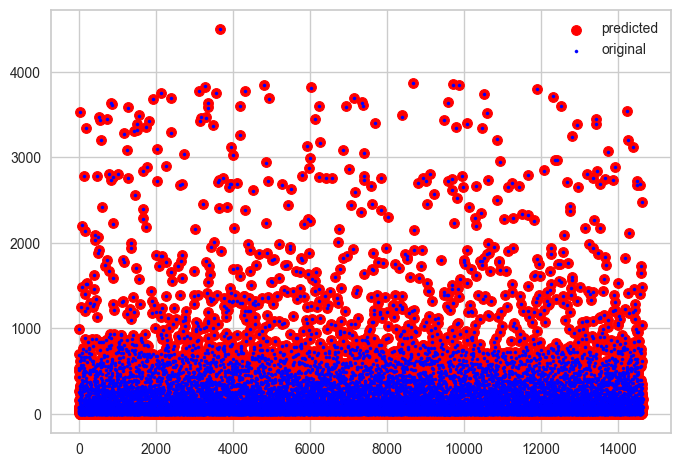

In [302]:
x_ax = range(len(ypred))
plt.scatter(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.scatter(x_ax, y_test_op, s=5, color="blue", label="original")
plt.legend()
plt.show()

In [179]:
import numpy as np
import scipy.stats as st

def BS_Option_Price(CP,S_0,K,sigma,tau,r):
    #Black-Scholes Call option price
    d1    = (np.log(S_0 / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    if CP == 0:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    else:
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

In [180]:
bsimp_pred = []
for x in X_test_op:
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred.append(val)
bsimp_pred

[507.3917011852309,
 67.35268541314633,
 542.6965037823733,
 29.650490305600016,
 58.467379189962685,
 992.1494673159282,
 695.1563633584415,
 12.867973577788064,
 153.99348584013092,
 433.03961898102307,
 45.29539474983619,
 83.43542639211535,
 30.610916352431786,
 15.231429819976995,
 262.0742414440972,
 81.34670023882734,
 5.806383899340638,
 28.560319060848357,
 3.6783518606074637,
 3.2411772384684028,
 1.36358069615126,
 12.503521080924202,
 0.6647591421702908,
 122.0018620541961,
 15.24629605795215,
 154.2644238162694,
 618.1864849461653,
 322.86760987680293,
 293.3599525008274,
 43.15201600381809,
 20.94139525883466,
 228.47248740729145,
 255.16915893065766,
 332.5080498718112,
 13.048336117733584,
 22.021433236606015,
 15.448998144098368,
 13.819379100233618,
 45.02989567217463,
 3527.964251111717,
 13.793315819199535,
 175.09377949880127,
 16.620118689162496,
 1.0695772980745915,
 113.66914442005779,
 0.9001064964127252,
 196.1217718946096,
 174.3459092678927,
 1.9313896285904

In [181]:
print("MSE: %.4f" % mean_squared_error(y_test_op,bsimp_pred))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op, bsimp_pred)))
print("MAE: %.4f" % mean_absolute_error(y_test_op, bsimp_pred))

MSE: 4.4799
RMSE: 2.1166
MAE: 1.5191


In [246]:
bsimp_pred_call = []
for x in call_op.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_call.append(val)
bsimp_pred_call

[507.3917011852309,
 67.35268541314633,
 29.650490305600016,
 58.467379189962685,
 433.03961898102307,
 83.43542639211535,
 30.610916352431786,
 15.231429819976995,
 262.0742414440972,
 81.34670023882734,
 5.806383899340638,
 28.560319060848357,
 3.2411772384684028,
 0.6647591421702908,
 15.24629605795215,
 618.1864849461653,
 322.86760987680293,
 43.15201600381809,
 228.47248740729145,
 22.021433236606015,
 15.448998144098368,
 13.793315819199535,
 1.0695772980745915,
 0.9001064964127252,
 174.3459092678927,
 1.9313896285904484,
 63.712185002275845,
 333.34104476113043,
 111.58908177952708,
 186.89610389423933,
 68.84580789699817,
 70.08688115219962,
 77.91215179866987,
 346.35146251723705,
 90.31246385234232,
 35.71350425189985,
 553.4603273705973,
 670.1656971109595,
 45.4687979825722,
 9.250535579454066,
 710.0753536039751,
 2.034283342803457,
 5.828710393952576,
 18.828750234077404,
 67.2953105409648,
 364.0492843207859,
 392.02199987886047,
 2.5993663223461354,
 1.201308225507723

In [248]:
print("MSE: %.4f" % mean_squared_error(y_test_op[call_op.index],bsimp_pred_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[call_op.index], bsimp_pred_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[call_op.index], bsimp_pred_call))

MSE: 4.4736
RMSE: 2.1151
MAE: 1.4936


In [249]:
bsimp_pred_st_call = []
for x in shortTerm_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_st_call.append(val)
bsimp_pred_st_call

[507.3917011852309,
 29.650490305600016,
 58.467379189962685,
 83.43542639211535,
 30.610916352431786,
 81.34670023882734,
 5.806383899340638,
 3.2411772384684028,
 0.6647591421702908,
 15.24629605795215,
 22.021433236606015,
 15.448998144098368,
 13.793315819199535,
 1.0695772980745915,
 0.9001064964127252,
 174.3459092678927,
 1.9313896285904484,
 111.58908177952708,
 186.89610389423933,
 68.84580789699817,
 70.08688115219962,
 35.71350425189985,
 553.4603273705973,
 45.4687979825722,
 9.250535579454066,
 710.0753536039751,
 2.034283342803457,
 5.828710393952576,
 18.828750234077404,
 67.2953105409648,
 364.0492843207859,
 392.02199987886047,
 2.5993663223461354,
 1.2013082255077236,
 37.09340266205362,
 17.820286535268593,
 5.511790757234195,
 16.620139574059863,
 23.771282693773628,
 16.246430894509274,
 4.618578506435028,
 452.8608180676399,
 2.322235162766109,
 161.45304015807642,
 4.272622734823393,
 326.54729959796305,
 8.240526391322419,
 2.5007387974561013,
 2.853476946550820

In [250]:
print("MSE: %.4f" % mean_squared_error(y_test_op[shortTerm_call.index],bsimp_pred_st_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[shortTerm_call.index], bsimp_pred_st_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[shortTerm_call.index], bsimp_pred_st_call))

MSE: 4.4308
RMSE: 2.1049
MAE: 1.4921


In [251]:
bsimp_pred_mt_call = []
for x in medTerm_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_mt_call.append(val)
bsimp_pred_mt_call

[433.03961898102307,
 15.231429819976995,
 262.0742414440972,
 28.560319060848357,
 618.1864849461653,
 43.15201600381809,
 228.47248740729145,
 63.712185002275845,
 333.34104476113043,
 77.91215179866987,
 670.1656971109595,
 323.92751685608215,
 63.39282728267247,
 148.48087684364373,
 36.0614687566208,
 576.4765026398239,
 34.78629614715355,
 306.73456503877424,
 26.461053262443855,
 21.2921419553207,
 49.72750416447471,
 62.54305753769336,
 175.35485373126266,
 14.096811987661056,
 24.98868345716602,
 11.16839459011451,
 2.9025656111284377,
 128.8389781912777,
 607.085977002974,
 44.59758194319099,
 28.46257562354583,
 92.93612608888986,
 765.2591323702387,
 758.2809088764319,
 663.6290140678436,
 9.292485944394208,
 159.08926154703659,
 5.222185435594707,
 155.22828336753003,
 79.34918157464779,
 336.7808055249565,
 32.32876306677679,
 275.7734527776248,
 136.89100881923946,
 135.11785083320814,
 38.66066740169805,
 501.9063013779951,
 51.51248186187942,
 585.451617957174,
 13.618

In [252]:
print("MSE: %.4f" % mean_squared_error(y_test_op[medTerm_call.index],bsimp_pred_mt_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[medTerm_call.index], bsimp_pred_mt_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[medTerm_call.index], bsimp_pred_mt_call))

MSE: 3.7497
RMSE: 1.9364
MAE: 1.3804


In [254]:
bsimp_pred_lt_call = []
for x in longTerm_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_lt_call.append(val)
bsimp_pred_lt_call

[67.35268541314633,
 322.86760987680293,
 346.35146251723705,
 90.31246385234232,
 72.79775146951997,
 79.59794751354647,
 472.14090657281946,
 33.30710879097684,
 305.89620450287487,
 385.00456381425266,
 505.8020362792814,
 491.41081952377067,
 420.3588821227577,
 738.008410612077,
 256.02186217396064,
 708.9963199318031,
 117.30541038206576,
 341.84915916298894,
 131.47946530485297,
 305.82980045870346,
 245.3718225535298,
 129.37786502656292,
 199.89282273577152,
 58.34731900863622,
 120.65708152154215,
 278.29015522163286,
 237.60111054269737,
 504.48762988620365,
 376.2118400516961,
 234.3081382081566,
 196.9357022628476,
 51.844823362732285,
 55.55106989725985,
 51.764311197282865,
 473.55991111775927,
 569.8017359315555,
 546.9746699146596,
 579.087180176625,
 464.53835505186817,
 292.7514691902197,
 567.547516899219,
 597.2235746020276,
 361.8625484189359,
 147.1596816358092,
 219.65526640661858,
 251.71686659317788,
 674.7138627808949,
 562.3415061984817,
 246.36232060749614,

In [255]:
print("MSE: %.4f" % mean_squared_error(y_test_op[longTerm_call.index],bsimp_pred_lt_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[longTerm_call.index], bsimp_pred_lt_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[longTerm_call.index], bsimp_pred_lt_call))

MSE: 6.5415
RMSE: 2.5576
MAE: 1.7852


In [261]:
bsimp_pred_put = []
for x in put_op.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_put.append(val)
bsimp_pred_put

[542.6965037823733,
 992.1494673159282,
 695.1563633584415,
 12.867973577788064,
 153.99348584013092,
 45.29539474983619,
 3.6783518606074637,
 1.36358069615126,
 12.503521080924202,
 122.0018620541961,
 154.2644238162694,
 293.3599525008274,
 20.94139525883466,
 255.16915893065766,
 332.5080498718112,
 13.048336117733584,
 13.819379100233618,
 45.02989567217463,
 3527.964251111717,
 175.09377949880127,
 16.620118689162496,
 113.66914442005779,
 196.1217718946096,
 1.8208143881375847,
 567.9873265712865,
 109.15748412619297,
 199.95649435355324,
 532.4853092437995,
 1251.3235704549043,
 636.4651818723516,
 713.3245908177671,
 18.391269626871264,
 217.23784595181826,
 1.1413958527981833,
 14.757177488204547,
 2203.12244744747,
 2.190717634006024,
 1480.6592117591745,
 20.41194229556575,
 21.101536177092413,
 257.4151942965008,
 155.08171501921095,
 40.234468922519795,
 4.067443532266928,
 357.49412841533484,
 443.27246914637476,
 46.73708610884648,
 56.69425446824948,
 120.9641105799492

In [262]:
print("MSE: %.4f" % mean_squared_error(y_test_op[put_op.index],bsimp_pred_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[put_op.index], bsimp_pred_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[put_op.index], bsimp_pred_put))

MSE: 4.4881
RMSE: 2.1185
MAE: 1.5517


In [305]:
bsimp_pred_st_put = []
for x in shortTerm_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_st_put.append(val)
bsimp_pred_st_put

[12.867973577788064,
 153.99348584013092,
 45.29539474983619,
 3.6783518606074637,
 1.36358069615126,
 12.503521080924202,
 20.94139525883466,
 255.16915893065766,
 13.048336117733584,
 13.819379100233618,
 45.02989567217463,
 16.620118689162496,
 1.8208143881375847,
 199.95649435355324,
 713.3245908177671,
 18.391269626871264,
 217.23784595181826,
 1.1413958527981833,
 14.757177488204547,
 2203.12244744747,
 2.190717634006024,
 20.41194229556575,
 21.101536177092413,
 257.4151942965008,
 155.08171501921095,
 40.234468922519795,
 4.067443532266928,
 46.73708610884648,
 56.69425446824948,
 120.96411057994925,
 0.8372323510515471,
 12.278100579307704,
 44.76073595131925,
 2.9238523712262605,
 138.80357962502273,
 505.7779462915539,
 22.36903611076778,
 276.1487733329079,
 534.1953130036791,
 3.8362437949756725,
 2.1678035680817374,
 497.8210377714338,
 2784.2702982085875,
 1.2418498629760393,
 2132.889806124529,
 1198.593596541871,
 98.47253882507289,
 182.74776785921074,
 289.9141576206

In [306]:
print("MSE: %.4f" % mean_squared_error(y_test_op[shortTerm_put.index],bsimp_pred_st_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[shortTerm_put.index], bsimp_pred_st_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[shortTerm_put.index], bsimp_pred_st_put))

MSE: 4.7429
RMSE: 2.1778
MAE: 1.5452


In [307]:
bsimp_pred_mt_put = []
for x in medTerm_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_mt_put.append(val)
bsimp_pred_mt_put

[992.1494673159282,
 695.1563633584415,
 154.2644238162694,
 293.3599525008274,
 332.5080498718112,
 3527.964251111717,
 175.09377949880127,
 113.66914442005779,
 196.1217718946096,
 567.9873265712865,
 532.4853092437995,
 1251.3235704549043,
 1480.6592117591745,
 443.27246914637476,
 763.7407701234469,
 628.6105222927143,
 137.04808593782963,
 271.39892225756506,
 263.1919164580765,
 147.46337854997205,
 49.201065272073464,
 1513.3206289109078,
 221.69511295883956,
 335.48773372080586,
 1241.7646876700896,
 315.37763501031134,
 223.02685337442597,
 374.1044778420462,
 470.417425253102,
 642.2270389546454,
 373.72206012384254,
 45.55957744803612,
 502.1652143656272,
 348.40655724150304,
 121.67811963835896,
 159.74974930593373,
 614.4601415571268,
 98.92357709785165,
 98.66869452974046,
 508.5299330120787,
 153.35040360629097,
 528.0838604208957,
 1254.147661807994,
 1619.5132586402144,
 1456.8662833657515,
 1279.1472266036508,
 328.0892081409685,
 872.5264566608644,
 2780.541773205453

In [308]:
print("MSE: %.4f" % mean_squared_error(y_test_op[medTerm_put.index],bsimp_pred_mt_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[medTerm_put.index], bsimp_pred_mt_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[medTerm_put.index], bsimp_pred_mt_put))

MSE: 3.6069
RMSE: 1.8992
MAE: 1.5091


In [309]:
bsimp_pred_lt_put = []
for x in longTerm_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_lt_put.append(val)
bsimp_pred_lt_put

[542.6965037823733,
 122.0018620541961,
 109.15748412619297,
 636.4651818723516,
 357.49412841533484,
 286.0396126602715,
 660.383758090182,
 500.39112815429746,
 882.4199182277084,
 280.90885506932074,
 389.4563144857238,
 159.24704475608968,
 116.91584159468084,
 124.54849692247109,
 872.4806675230518,
 287.8396592794545,
 511.7364308245185,
 2029.3582934784217,
 386.1142774016591,
 275.41855239688095,
 225.6723964203893,
 323.79363293562284,
 265.5865738809164,
 92.61287917859667,
 392.1433847329778,
 130.9005571958119,
 510.3455017610553,
 552.1163308121211,
 220.8253045011794,
 518.0814988008706,
 269.88074510661295,
 181.14262920292902,
 584.2734744163158,
 354.32054862340124,
 934.4011141942312,
 325.179359328529,
 336.36028408587265,
 449.181595597139,
 321.1387136466045,
 215.69865607093845,
 829.3228416950948,
 924.2535071365037,
 713.5635130719237,
 109.12168021104455,
 238.25903293939723,
 664.0728870077675,
 210.85223419687196,
 254.69992969222244,
 343.48285330287354,
 11

In [310]:
print("MSE: %.4f" % mean_squared_error(y_test_op[longTerm_put.index],bsimp_pred_lt_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[longTerm_put.index], bsimp_pred_lt_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[longTerm_put.index], bsimp_pred_lt_put))

MSE: 4.9023
RMSE: 2.2141
MAE: 1.7212


In [346]:
bsimp_pred_call_ditm = []
for x in ditm_op_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_call_ditm.append(val)
bsimp_pred_call_ditm

[67.35268541314633,
 29.650490305600016,
 15.231429819976995,
 5.806383899340638,
 28.560319060848357,
 3.2411772384684028,
 0.6647591421702908,
 322.86760987680293,
 43.15201600381809,
 174.3459092678927,
 1.9313896285904484,
 63.712185002275845,
 70.08688115219962,
 77.91215179866987,
 90.31246385234232,
 45.4687979825722,
 9.250535579454066,
 2.034283342803457,
 2.5993663223461354,
 1.2013082255077236,
 37.09340266205362,
 72.79775146951997,
 63.39282728267247,
 17.820286535268593,
 36.0614687566208,
 5.511790757234195,
 79.59794751354647,
 16.620139574059863,
 33.30710879097684,
 305.89620450287487,
 16.246430894509274,
 2.322235162766109,
 385.00456381425266,
 34.78629614715355,
 4.272622734823393,
 26.461053262443855,
 21.2921419553207,
 49.72750416447471,
 2.8534769465508205,
 0.9168798724742757,
 6.5621621364485065,
 62.54305753769336,
 1.3427317968041663,
 13.033289040378733,
 5.261886505289489,
 89.0524456880438,
 14.096811987661056,
 24.98868345716602,
 15.33538966919771,
 1

In [347]:
print("MSE: %.4f" % mean_squared_error(y_test_op[ditm_op_call.index],bsimp_pred_call_ditm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[ditm_op_call.index], bsimp_pred_call_ditm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[ditm_op_call.index], bsimp_pred_call_ditm))

MSE: 3.6805
RMSE: 1.9185
MAE: 1.3939


In [348]:
bsimp_pred_call_itm = []
for x in itm_op_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_call_itm.append(val)
bsimp_pred_call_itm

[83.43542639211535,
 262.0742414440972,
 81.34670023882734,
 15.24629605795215,
 228.47248740729145,
 22.021433236606015,
 13.793315819199535,
 0.9001064964127252,
 111.58908177952708,
 5.828710393952576,
 148.48087684364373,
 23.771282693773628,
 505.8020362792814,
 8.240526391322419,
 2.5007387974561013,
 17.703273756585816,
 6.400342566776175,
 175.35485373126266,
 420.3588821227577,
 16.378210479737504,
 119.03360797209984,
 11.516996972243248,
 102.88563265643245,
 1.8193818322965214,
 25.065191217330323,
 181.41041691912528,
 153.9951512446878,
 59.75342614813496,
 4.7695074639816255,
 37.26284054222458,
 3.636152740733806,
 113.6279504387362,
 36.987642705247595,
 336.7808055249565,
 0.5499972264573572,
 41.93772353559439,
 275.7734527776248,
 60.53109332369252,
 60.06651166985927,
 7.605523676110664,
 136.89100881923946,
 135.11785083320814,
 38.63389995246774,
 17.147496790522894,
 115.26205553066819,
 188.81326052087695,
 278.29015522163286,
 33.42494514375812,
 43.7750867488

In [349]:
print("MSE: %.4f" % mean_squared_error(y_test_op[itm_op_call.index],bsimp_pred_call_itm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[itm_op_call.index], bsimp_pred_call_itm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[itm_op_call.index], bsimp_pred_call_itm))

MSE: 5.4225
RMSE: 2.3286
MAE: 1.6035


In [350]:
bsimp_pred_call_atm = []
for x in atm_op_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_call_atm.append(val)
bsimp_pred_call_atm

[58.467379189962685,
 30.610916352431786,
 15.448998144098368,
 1.0695772980745915,
 333.34104476113043,
 68.84580789699817,
 35.71350425189985,
 18.828750234077404,
 67.2953105409648,
 323.92751685608215,
 472.14090657281946,
 4.618578506435028,
 137.36254278958756,
 46.15614474570566,
 5.629249804402718,
 49.754140550852185,
 121.72432597510112,
 67.7372626402389,
 29.042712334026533,
 44.57297575502571,
 174.14940559648983,
 58.7378161913914,
 8.07068029620865,
 80.418704555972,
 53.5897010741578,
 168.44869713242792,
 28.522349768019467,
 187.82764053945561,
 28.58049549067232,
 365.5718093631642,
 155.57491384133107,
 56.005316112627156,
 4.818294269256967,
 4.040583402720813,
 65.9938057893105,
 104.77144473914268,
 150.08785637096594,
 26.45855771424135,
 120.10157410817612,
 277.97365003993013,
 42.96151630709801,
 81.25703434952345,
 16.39406036556329,
 44.19497948237586,
 75.09508560238169,
 272.3445454118913,
 86.99064170357883,
 75.96283930249774,
 5.139611714006321,
 108.0

In [351]:
print("MSE: %.4f" % mean_squared_error(y_test_op[atm_op_call.index],bsimp_pred_call_atm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[atm_op_call.index], bsimp_pred_call_atm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[atm_op_call.index], bsimp_pred_call_atm))

MSE: 6.3554
RMSE: 2.5210
MAE: 1.7531


In [352]:
bsimp_pred_call_otm = []
for x in otm_op_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_call_otm.append(val)
bsimp_pred_call_otm

[186.89610389423933,
 346.35146251723705,
 364.0492843207859,
 161.45304015807642,
 306.73456503877424,
 326.54729959796305,
 491.41081952377067,
 126.34530269870618,
 115.17735135877979,
 100.76015278321142,
 92.88090357746864,
 168.04426627277462,
 128.04894006157986,
 165.52363701631725,
 215.6461668464881,
 113.56499926960453,
 104.89204837729562,
 501.9063013779951,
 202.6336303145373,
 384.03315064196283,
 242.01511458956838,
 140.53105085140191,
 109.27021130833691,
 504.48762988620365,
 84.81045757383174,
 108.9235158558995,
 467.0262571522304,
 272.7109309597348,
 154.87642135904434,
 296.9449207702935,
 307.12675238268184,
 199.3572692883364,
 131.43030799778967,
 495.3299581256225,
 207.9232716497545,
 117.69388134340943,
 569.8017359315555,
 546.9746699146596,
 579.087180176625,
 365.1111557486581,
 71.82258548594291,
 332.3770645322768,
 567.547516899219,
 89.28947885392131,
 597.2235746020276,
 222.2656389088013,
 279.4717231640104,
 162.70787987169956,
 168.7301984598776

In [353]:
print("MSE: %.4f" % mean_squared_error(y_test_op[otm_op_call.index],bsimp_pred_call_otm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[otm_op_call.index], bsimp_pred_call_otm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[otm_op_call.index], bsimp_pred_call_otm))

MSE: 4.7852
RMSE: 2.1875
MAE: 1.5359


In [354]:
bsimp_pred_call_dotm = []
for x in dotm_op_call.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_call_dotm.append(val)
bsimp_pred_call_dotm

[507.3917011852309,
 433.03961898102307,
 618.1864849461653,
 553.4603273705973,
 670.1656971109595,
 710.0753536039751,
 392.02199987886047,
 576.4765026398239,
 452.8608180676399,
 738.008410612077,
 607.085977002974,
 765.2591323702387,
 708.9963199318031,
 758.2809088764319,
 663.6290140678436,
 488.96415822949905,
 366.3698361582651,
 467.9495798250839,
 696.1333506156209,
 623.7567045442656,
 517.4800121985736,
 503.7544893804479,
 585.451617957174,
 265.59294629044905,
 451.53831957850343,
 551.6839001519269,
 423.74207670546684,
 422.9848963297733,
 563.4825671932036,
 373.16846701141185,
 481.82195716923866,
 416.8788475399059,
 635.3610349898217,
 327.61130701780166,
 667.8627152699927,
 563.1673328464071,
 674.7138627808949,
 756.7535770978516,
 764.1642323614767,
 560.4388205228379,
 886.5104309406223,
 594.9859948883585,
 481.9691258138357,
 618.7362087213894,
 636.4631968013907,
 399.329691355229,
 516.2725784054094,
 706.4716629831154,
 726.8600526147635,
 608.3300007308

In [355]:
print("MSE: %.4f" % mean_squared_error(y_test_op[dotm_op_call.index],bsimp_pred_call_dotm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[dotm_op_call.index], bsimp_pred_call_dotm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[dotm_op_call.index], bsimp_pred_call_dotm))

MSE: 3.5919
RMSE: 1.8952
MAE: 1.3610


In [356]:
bsimp_pred_put_ditm = []
for x in ditm_op_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_put_ditm.append(val)
bsimp_pred_put_ditm

[3.6783518606074637,
 122.0018620541961,
 45.02989567217463,
 175.09377949880127,
 113.66914442005779,
 1.8208143881375847,
 109.15748412619297,
 1.1413958527981833,
 2.190717634006024,
 20.41194229556575,
 21.101536177092413,
 4.067443532266928,
 357.49412841533484,
 120.96411057994925,
 12.278100579307704,
 2.9238523712262605,
 3.8362437949756725,
 263.1919164580765,
 21.128052498806824,
 49.201065272073464,
 280.90885506932074,
 159.24704475608968,
 4.345518317208288,
 116.91584159468084,
 17.50172939078122,
 124.54849692247109,
 1.0056610673096351,
 2.649108330156608,
 15.81001219857356,
 1.3385774176433003,
 45.55957744803612,
 2.70809749583038,
 35.17242604184213,
 1.1559568358700663,
 98.92357709785165,
 98.66869452974046,
 4.660356308839667,
 2.4411246643556055,
 5.7071330236934585,
 225.6723964203893,
 82.94084329175425,
 14.43124526519064,
 31.042330698590348,
 7.3585073334705555,
 82.45441792359324,
 3.6035465548324623,
 14.61413797378897,
 111.15235579713897,
 92.6128791785

In [357]:
print("MSE: %.4f" % mean_squared_error(y_test_op[ditm_op_put.index],bsimp_pred_put_ditm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[ditm_op_put.index], bsimp_pred_put_ditm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[ditm_op_put.index], bsimp_pred_put_ditm))

MSE: 2.9813
RMSE: 1.7266
MAE: 1.4062


In [358]:
bsimp_pred_put_itm = []
for x in itm_op_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_put_itm.append(val)
bsimp_pred_put_itm

[1.36358069615126,
 154.2644238162694,
 20.94139525883466,
 196.1217718946096,
 18.391269626871264,
 14.757177488204547,
 0.8372323510515471,
 286.0396126602715,
 138.80357962502273,
 22.36903611076778,
 137.04808593782963,
 2.1678035680817374,
 1.2418498629760393,
 147.46337854997205,
 16.12125901663569,
 67.1862637288084,
 223.02685337442597,
 137.44651068724795,
 25.752546323088325,
 22.29218928627546,
 35.01459207242442,
 71.49163234132573,
 11.11238642903615,
 1.5084104599071182,
 19.75652530897969,
 78.87492237472128,
 121.67811963835896,
 159.74974930593373,
 39.14015959148975,
 153.35040360629097,
 197.52676703834334,
 9.291328014871425,
 8.298799402195158,
 167.9521540626937,
 29.05964321240134,
 287.8396592794545,
 6.108323891974422,
 39.12894748139135,
 78.90548925527713,
 103.34351502133234,
 37.61539221033951,
 118.69651835592538,
 328.0892081409685,
 275.41855239688095,
 36.99745994681271,
 56.19337192019191,
 437.4411328689712,
 17.968367335896687,
 158.50754241133723,
 

In [359]:
print("MSE: %.4f" % mean_squared_error(y_test_op[itm_op_put.index],bsimp_pred_put_itm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[itm_op_put.index], bsimp_pred_put_itm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[itm_op_put.index], bsimp_pred_put_itm))

MSE: 4.7575
RMSE: 2.1812
MAE: 1.5677


In [360]:
bsimp_pred_put_atm = []
for x in atm_op_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_put_atm.append(val)
bsimp_pred_put_atm

[12.867973577788064,
 153.99348584013092,
 45.29539474983619,
 12.503521080924202,
 332.5080498718112,
 13.048336117733584,
 13.819379100233618,
 16.620118689162496,
 217.23784595181826,
 257.4151942965008,
 40.234468922519795,
 46.73708610884648,
 56.69425446824948,
 44.76073595131925,
 271.39892225756506,
 98.47253882507289,
 182.74776785921074,
 389.4563144857238,
 143.46195986934083,
 80.66123124539695,
 4.388969335425372,
 29.964795267603904,
 44.80003965327876,
 89.53014777754788,
 80.18845640855488,
 125.71033716357499,
 49.822730623140274,
 144.79378791959846,
 9.711346545831589,
 38.52049674815885,
 1.4791144656801407,
 272.7824279378682,
 92.61476388558401,
 6.753956964450936,
 134.61470307456034,
 191.058748447134,
 100.68038280822134,
 142.5720735203996,
 62.634500125300406,
 177.40960683569938,
 386.1142774016591,
 73.69003310819562,
 57.26052701076969,
 86.20813690105467,
 36.91902353718126,
 24.220174166777042,
 72.38725484282327,
 161.39279860755255,
 49.26195023596483,

In [361]:
print("MSE: %.4f" % mean_squared_error(y_test_op[atm_op_put.index],bsimp_pred_put_atm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[atm_op_put.index], bsimp_pred_put_atm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[atm_op_put.index], bsimp_pred_put_atm))

MSE: 6.8211
RMSE: 2.6117
MAE: 1.7967


In [362]:
bsimp_pred_put_otm = []
for x in otm_op_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_put_otm.append(val)
bsimp_pred_put_otm

[542.6965037823733,
 293.3599525008274,
 255.16915893065766,
 199.95649435355324,
 155.08171501921095,
 628.6105222927143,
 500.39112815429746,
 289.914157620635,
 221.69511295883956,
 335.48773372080586,
 315.37763501031134,
 374.1044778420462,
 141.62490883746023,
 121.05888036149804,
 289.0474236147734,
 470.417425253102,
 205.22528643325245,
 231.73754026456277,
 373.72206012384254,
 348.40655724150304,
 303.2741581577985,
 293.77877043672515,
 508.5299330120787,
 528.0838604208957,
 283.8199702241948,
 511.7364308245185,
 341.06673298341116,
 386.32122934173196,
 307.7559979998189,
 119.89687743777108,
 303.0694600641366,
 153.3321441278381,
 257.8681951229619,
 154.54276115803373,
 342.80085260856436,
 596.9478666122595,
 212.05911645001197,
 233.45202113286723,
 190.98365684753037,
 93.4854477645872,
 274.383157724433,
 400.7010865605539,
 552.1163308121211,
 207.29503629806152,
 179.37206316541824,
 518.0814988008706,
 226.47673836308593,
 232.89254270436686,
 112.0453643252265

In [363]:
print("MSE: %.4f" % mean_squared_error(y_test_op[otm_op_put.index],bsimp_pred_put_otm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[otm_op_put.index], bsimp_pred_put_otm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[otm_op_put.index], bsimp_pred_put_otm))

MSE: 4.5881
RMSE: 2.1420
MAE: 1.5421


In [364]:
bsimp_pred_put_dotm = []
for x in dotm_op_put.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[4],x[3],0)
    bsimp_pred_put_dotm.append(val)
bsimp_pred_put_dotm

[992.1494673159282,
 695.1563633584415,
 3527.964251111717,
 567.9873265712865,
 532.4853092437995,
 1251.3235704549043,
 636.4651818723516,
 713.3245908177671,
 2203.12244744747,
 1480.6592117591745,
 443.27246914637476,
 763.7407701234469,
 505.7779462915539,
 276.1487733329079,
 534.1953130036791,
 660.383758090182,
 497.8210377714338,
 2784.2702982085875,
 2132.889806124529,
 1198.593596541871,
 1399.234883455649,
 882.4199182277084,
 3347.7259408571817,
 484.2591821867504,
 1513.3206289109078,
 664.6501863515327,
 1525.3431591499861,
 1241.7646876700896,
 844.4373405594549,
 642.2270389546454,
 502.1652143656272,
 508.9295075374,
 1301.5808296401704,
 506.82637494535993,
 872.4806675230518,
 614.4601415571268,
 798.6269126180055,
 1254.147661807994,
 1619.5132586402144,
 1456.8662833657515,
 1279.1472266036508,
 2089.1522319230526,
 2029.3582934784217,
 290.55044899970926,
 872.5264566608644,
 1339.4409079066181,
 485.3048461550263,
 2780.541773205453,
 1129.2699679051916,
 588.02

In [365]:
print("MSE: %.4f" % mean_squared_error(y_test_op[dotm_op_put.index],bsimp_pred_put_dotm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[dotm_op_put.index], bsimp_pred_put_dotm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[dotm_op_put.index], bsimp_pred_put_dotm))

MSE: 3.7479
RMSE: 1.9360
MAE: 1.4887


In [268]:
X_test_op_hv = pd.DataFrame(X_test_op)
X_test_op_hv.columns = ['Strike Price', 'Call/Put', 'Asset Price','Time to Expiry', 'GIV']
X_test_op_hv['HV60'] = X_test['HV60']

In [269]:
call_op_hv = X_test_op_hv[X_test_op_hv['Call/Put'] == 0]
call_op_hv

,Strike Price,Call/Put,Asset Price,Time to Expiry,GIV,HV60
0,1400.0,0.0,1871.12,0.188060,0.653331,0.5761
1,6500.0,0.0,2102.13,0.957907,0.744964,0.5599
3,1700.0,0.0,1185.22,0.174395,0.769250,0.9134
4,1500.0,0.0,1543.03,0.002740,1.023884,0.9983
9,1300.0,0.0,1653.36,0.335055,0.624932,0.5142
...,...,...,...,...,...,...
14637,3600.0,0.0,1900.41,0.226074,0.676582,0.5899
14639,1750.0,0.0,1702.64,0.057534,1.006601,0.9484
14643,1550.0,0.0,1535.27,0.037458,0.692405,0.6753
14644,1900.0,0.0,1520.83,0.232877,0.996028,1.0094


In [270]:
put_op_hv = X_test_op_hv[X_test_op_hv['Call/Put'] == 1]
put_op_hv

,Strike Price,Call/Put,Asset Price,Time to Expiry,GIV,HV60
2,1900.0,1.0,1698.15,0.900334,0.648516,0.4970
5,2500.0,1.0,1607.20,0.618126,0.630085,0.5026
6,2200.0,1.0,1636.20,0.587734,0.591947,0.5137
7,1500.0,1.0,1543.58,0.002740,0.935148,1.0099
8,1750.0,1.0,1707.55,0.032877,1.054663,0.9719
...,...,...,...,...,...,...
14635,2600.0,1.0,1589.06,0.199025,0.818526,0.5040
14638,3500.0,1.0,2095.29,0.451162,0.663464,0.5290
14640,4000.0,1.0,1526.76,0.171674,0.926115,0.6753
14641,1800.0,1.0,1620.34,0.038356,1.030444,0.9915


In [271]:
bshv_pred = []
for x in X_test_op_hv.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred.append(val)
bshv_pred

[495.5509389733859,
 14.195225642588994,
 445.5627577290204,
 49.41582849856118,
 57.763034331398785,
 944.5707419457945,
 660.4115032600428,
 14.894412206905997,
 143.7799766153904,
 404.75485972341596,
 52.84759764713522,
 81.38115679085138,
 25.842049275645536,
 16.719053559294153,
 244.52876390354174,
 75.58335603652097,
 5.312041909289583,
 18.385744480899774,
 0.2802719997958949,
 0.0382830082118919,
 0.0339447052889752,
 1.7661871954232993,
 0.12162136662452405,
 116.6057127062005,
 38.87461523827534,
 206.75831867973528,
 600.6761851130232,
 263.21906395718247,
 324.4768916445104,
 2.59085773588415,
 12.070839796493146,
 290.8358972818783,
 218.04600870156503,
 242.24718732497126,
 9.885015586962993,
 8.320693085296568,
 23.009918778093493,
 15.652440206562801,
 22.464049192255317,
 3521.6225193094706,
 24.88490199605286,
 113.51737884457037,
 22.367836971092515,
 2.8344836905363877,
 96.83108880001961,
 0.0018484190275576684,
 241.9719373461636,
 171.50038487094406,
 0.7044467

In [272]:
print("MSE: %.4f" % mean_squared_error(y_test_op,bshv_pred))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op, bshv_pred)))
print("MAE: %.4f" % mean_absolute_error(y_test_op, bshv_pred))

MSE: 693.5612
RMSE: 26.3356
MAE: 17.2063


In [273]:
bshv_pred_call = []
for x in call_op_hv.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_call.append(val)
bshv_pred_call

[495.5509389733859,
 14.195225642588994,
 49.41582849856118,
 57.763034331398785,
 404.75485972341596,
 81.38115679085138,
 25.842049275645536,
 16.719053559294153,
 244.52876390354174,
 75.58335603652097,
 5.312041909289583,
 18.385744480899774,
 0.0382830082118919,
 0.12162136662452405,
 38.87461523827534,
 600.6761851130232,
 263.21906395718247,
 2.59085773588415,
 290.8358972818783,
 8.320693085296568,
 23.009918778093493,
 24.88490199605286,
 2.8344836905363877,
 0.0018484190275576684,
 171.50038487094406,
 0.7044467215623476,
 81.72125560850242,
 238.8902215754946,
 171.010400386605,
 185.50343909231697,
 65.59968972054935,
 40.19715556632855,
 56.29874492265799,
 417.4548098740955,
 38.581224965076586,
 41.63235156890198,
 553.4100000000001,
 619.2158220829551,
 56.78345239525868,
 5.311778351754796,
 694.6256449690468,
 1.101726013755366,
 17.476088017709515,
 19.202094161920286,
 54.596251777438624,
 353.94435665984156,
 382.75646911764306,
 0.13767525561320637,
 0.78207025464

In [274]:
print("MSE: %.4f" % mean_squared_error(y_test_op[call_op_hv.index],bshv_pred_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[call_op_hv.index], bshv_pred_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[call_op_hv.index], bshv_pred_call))

MSE: 716.2479
RMSE: 26.7628
MAE: 17.4725


In [287]:
bshv_pred_st_call = []
for x in X_test_op_hv.to_numpy()[shortTerm_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_st_call.append(val)
bshv_pred_st_call

[495.5509389733859,
 49.41582849856118,
 57.763034331398785,
 81.38115679085138,
 25.842049275645536,
 75.58335603652097,
 5.312041909289583,
 0.0382830082118919,
 0.12162136662452405,
 38.87461523827534,
 8.320693085296568,
 23.009918778093493,
 24.88490199605286,
 2.8344836905363877,
 0.0018484190275576684,
 171.50038487094406,
 0.7044467215623476,
 171.010400386605,
 185.50343909231697,
 65.59968972054935,
 40.19715556632855,
 41.63235156890198,
 553.4100000000001,
 56.78345239525868,
 5.311778351754796,
 694.6256449690468,
 1.101726013755366,
 17.476088017709515,
 19.202094161920286,
 54.596251777438624,
 353.94435665984156,
 382.75646911764306,
 0.13767525561320637,
 0.7820702546471079,
 19.09744433615026,
 54.866223798201986,
 1.439688242544925,
 16.273323623968963,
 24.47421354057741,
 7.068046292020725,
 5.823892294103018,
 448.06121346931013,
 0.012558759563080168,
 153.12082387804526,
 0.09611581033236383,
 298.34710175359805,
 20.178392548734166,
 4.529008802458748,
 2.57586

In [288]:
print("MSE: %.4f" % mean_squared_error(y_test_op[shortTerm_call.index],bshv_pred_st_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[shortTerm_call.index], bshv_pred_st_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[shortTerm_call.index], bshv_pred_st_call))

MSE: 182.5071
RMSE: 13.5095
MAE: 9.1611


In [289]:
bshv_pred_mt_call = []
for x in X_test_op_hv.to_numpy()[medTerm_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_mt_call.append(val)
bshv_pred_mt_call

[404.75485972341596,
 16.719053559294153,
 244.52876390354174,
 18.385744480899774,
 600.6761851130232,
 2.59085773588415,
 290.8358972818783,
 81.72125560850242,
 238.8902215754946,
 56.29874492265799,
 619.2158220829551,
 311.78796601426313,
 61.70342515657248,
 139.53491855719278,
 35.36301128726694,
 533.7722369392777,
 22.61122696925935,
 374.43820009170054,
 41.056389848077,
 20.335388092597483,
 53.932926897848205,
 35.95874509484875,
 165.15184167235395,
 1.4320321523302777,
 4.449155419844189,
 10.334213724777456,
 0.06045087495237622,
 82.80648496494393,
 583.3259233645883,
 97.79612723912169,
 14.012156049540366,
 102.55430065887509,
 718.1153921854731,
 722.2594698879147,
 643.4603539155041,
 10.605541870449905,
 148.65329758754075,
 0.019676182363707773,
 127.65347186937191,
 89.60951858529151,
 358.4239989569265,
 78.0940235798505,
 251.13203373914598,
 158.56389594913605,
 205.88377583487528,
 41.513814920466615,
 482.342482890774,
 20.792136138768598,
 544.3901801697457

In [290]:
print("MSE: %.4f" % mean_squared_error(y_test_op[medTerm_call.index],bshv_pred_mt_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[medTerm_call.index], bshv_pred_mt_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[medTerm_call.index], bshv_pred_mt_call))

MSE: 1252.6341
RMSE: 35.3926
MAE: 27.8455


In [291]:
bshv_pred_lt_call = []
for x in X_test_op_hv.to_numpy()[longTerm_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_lt_call.append(val)
bshv_pred_lt_call

[14.195225642588994,
 263.21906395718247,
 417.4548098740955,
 38.581224965076586,
 25.69775219874292,
 15.517486951933321,
 465.4934417993293,
 5.345575281778,
 260.5473867845694,
 424.6290654120002,
 497.747355404567,
 413.5049666883233,
 346.47919538919086,
 739.1571479827577,
 221.91925395163446,
 678.5742740623955,
 70.8141221991844,
 367.73538313231273,
 93.30488450378164,
 319.1740315409218,
 186.6134594900543,
 51.566754117692255,
 294.6432607996932,
 11.12548441160942,
 121.5620876936832,
 308.1946031974951,
 234.14939155203734,
 417.3004003076031,
 311.21559748876643,
 239.58132020970163,
 121.62380701214681,
 133.38848546726481,
 138.00147204198615,
 18.24740418202977,
 469.1876721166012,
 484.50099073768774,
 561.7062613399748,
 583.2376365024181,
 473.7243148930244,
 278.37135800862393,
 577.3475156460777,
 614.6480773586914,
 371.4216434777607,
 157.77841127573095,
 288.92309503975514,
 239.24869818584017,
 576.1970983471165,
 540.5881646336975,
 306.06568188024096,
 248.

In [292]:
print("MSE: %.4f" % mean_squared_error(y_test_op[longTerm_call.index],bshv_pred_lt_call))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[longTerm_call.index], bshv_pred_lt_call)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[longTerm_call.index], bshv_pred_lt_call))

MSE: 2636.7304
RMSE: 51.3491
MAE: 42.3351


In [424]:
bshv_pred_call_ditm = []
for x in X_test_op_hv.to_numpy()[ditm_op_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_call_ditm.append(val)
bshv_pred_call_ditm

[14.195225642588994,
 49.41582849856118,
 16.719053559294153,
 5.312041909289583,
 18.385744480899774,
 0.0382830082118919,
 0.12162136662452405,
 263.21906395718247,
 2.59085773588415,
 171.50038487094406,
 0.7044467215623476,
 81.72125560850242,
 40.19715556632855,
 56.29874492265799,
 38.581224965076586,
 56.78345239525868,
 5.311778351754796,
 1.101726013755366,
 0.13767525561320637,
 0.7820702546471079,
 19.09744433615026,
 25.69775219874292,
 61.70342515657248,
 54.866223798201986,
 35.36301128726694,
 1.439688242544925,
 15.517486951933321,
 16.273323623968963,
 5.345575281778,
 260.5473867845694,
 7.068046292020725,
 0.012558759563080168,
 424.6290654120002,
 22.61122696925935,
 0.09611581033236383,
 41.056389848077,
 20.335388092597483,
 53.932926897848205,
 2.575860288597024,
 0.35791100936179276,
 3.581092180743937,
 35.95874509484875,
 0.3378642208856073,
 16.143972760959628,
 8.528841810400166,
 95.50255099451346,
 1.4320321523302777,
 4.449155419844189,
 3.719567416228301

In [425]:
print("MSE: %.4f" % mean_squared_error(y_test_op[ditm_op_call.index],bshv_pred_call_ditm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[ditm_op_call.index], bshv_pred_call_ditm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[ditm_op_call.index], bshv_pred_call_ditm))

MSE: 714.6921
RMSE: 26.7337
MAE: 17.4558


In [429]:
bshv_pred_call_itm = []
for x in X_test_op_hv.to_numpy()[itm_op_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_call_itm.append(val)
bshv_pred_call_itm

[81.38115679085138,
 244.52876390354174,
 75.58335603652097,
 38.87461523827534,
 290.8358972818783,
 8.320693085296568,
 24.88490199605286,
 0.0018484190275576684,
 171.010400386605,
 17.476088017709515,
 139.53491855719278,
 24.47421354057741,
 497.747355404567,
 20.178392548734166,
 4.529008802458748,
 9.04479106474696,
 24.887074530407858,
 165.15184167235395,
 346.47919538919086,
 8.96008081850647,
 109.48146913122753,
 12.132893228875616,
 102.27474980823479,
 0.38957487195780516,
 25.90229486818771,
 180.6641393425208,
 151.80354416151886,
 42.82608096489082,
 9.73233414326063,
 60.780201140540555,
 1.1464313456219202,
 151.99802232519835,
 30.258630790619463,
 358.4239989569265,
 0.6137130179898165,
 23.853735611032732,
 251.13203373914598,
 29.65487809452486,
 112.54189607613989,
 4.317620698254117,
 158.56389594913605,
 205.88377583487528,
 41.48947399487321,
 10.850326391429121,
 94.87207383615373,
 179.86122363641846,
 308.1946031974951,
 32.0520902992605,
 36.3859716049432

In [430]:
print("MSE: %.4f" % mean_squared_error(y_test_op[itm_op_call.index],bshv_pred_call_itm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[itm_op_call.index], bshv_pred_call_itm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[itm_op_call.index], bshv_pred_call_itm))

MSE: 801.4967
RMSE: 28.3107
MAE: 18.1661


In [431]:
bshv_pred_call_atm = []
for x in X_test_op_hv.to_numpy()[atm_op_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_call_atm.append(val)
bshv_pred_call_atm

[57.763034331398785,
 25.842049275645536,
 23.009918778093493,
 2.8344836905363877,
 238.8902215754946,
 65.59968972054935,
 41.63235156890198,
 19.202094161920286,
 54.596251777438624,
 311.78796601426313,
 465.4934417993293,
 5.823892294103018,
 174.26276843759945,
 46.10648143095568,
 6.19352483191517,
 55.14150110249318,
 117.09452442659108,
 75.91229854162077,
 30.80472398839231,
 55.05477564811207,
 138.18592651688675,
 50.77452936497798,
 16.288941537102232,
 69.1480917084856,
 53.96307755975545,
 160.46839638179972,
 29.601678148028213,
 189.7330865643837,
 23.91746580348604,
 358.29869982581965,
 168.89208724988066,
 56.46214954222933,
 0.9473339496334177,
 8.504239952857915,
 80.59055666529537,
 111.11243955068392,
 142.40573615506037,
 34.58728579664671,
 127.50456026397796,
 209.6665479507983,
 46.67961421104155,
 71.08942844315584,
 21.675615321277405,
 50.825070759606206,
 60.50093007282544,
 247.15880572814729,
 92.90724980418918,
 82.3738960741382,
 8.190486450182732,
 

In [432]:
print("MSE: %.4f" % mean_squared_error(y_test_op[atm_op_call.index],bshv_pred_call_atm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[atm_op_call.index], bshv_pred_call_atm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[atm_op_call.index], bshv_pred_call_atm))

MSE: 534.2426
RMSE: 23.1137
MAE: 14.2982


In [433]:
bshv_pred_call_otm = []
for x in X_test_op_hv.to_numpy()[otm_op_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_call_otm.append(val)
bshv_pred_call_otm

[185.50343909231697,
 417.4548098740955,
 353.94435665984156,
 153.12082387804526,
 374.43820009170054,
 298.34710175359805,
 413.5049666883233,
 143.5118902987232,
 103.48513216857145,
 98.95209822125958,
 92.51369268533358,
 173.76346781654024,
 137.32803942203304,
 181.48103268766215,
 196.78645036511125,
 117.40143774950934,
 97.20568780497501,
 482.342482890774,
 193.421134528043,
 356.5650912759876,
 241.14927896172344,
 143.6431007132087,
 118.2103768384352,
 417.3004003076031,
 79.19782427621749,
 108.50740162693683,
 449.4401449188059,
 266.73208208715573,
 143.97683029464224,
 295.8210857479751,
 387.31313326559655,
 189.38950548434673,
 165.3452331709076,
 495.57043242916745,
 207.9200220343614,
 118.34973637898202,
 484.50099073768774,
 561.7062613399748,
 583.2376365024181,
 365.70225788679943,
 70.89818437666213,
 285.9519692629585,
 577.3475156460777,
 92.44264355212465,
 614.6480773586914,
 244.00303366943547,
 268.667195064455,
 147.8318091209818,
 164.9127927828889,
 

In [434]:
print("MSE: %.4f" % mean_squared_error(y_test_op[otm_op_call.index],bshv_pred_call_otm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[otm_op_call.index], bshv_pred_call_otm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[otm_op_call.index], bshv_pred_call_otm))

MSE: 722.9500
RMSE: 26.8877
MAE: 17.7180


In [435]:
bshv_pred_call_dotm = []
for x in X_test_op_hv.to_numpy()[dotm_op_call.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_call_dotm.append(val)
bshv_pred_call_dotm

[495.5509389733859,
 404.75485972341596,
 600.6761851130232,
 553.4100000000001,
 619.2158220829551,
 694.6256449690468,
 382.75646911764306,
 533.7722369392777,
 448.06121346931013,
 739.1571479827577,
 583.3259233645883,
 718.1153921854731,
 678.5742740623955,
 722.2594698879147,
 643.4603539155041,
 470.1299785539088,
 358.12929219363355,
 453.49996055182805,
 696.1300000000001,
 608.1641356071282,
 508.76462724855264,
 492.5361161563915,
 544.3901801697457,
 265.39144445351803,
 449.1485540245751,
 497.6430807608592,
 423.73000000007437,
 452.7477197345302,
 536.5076206247063,
 371.69214405319894,
 481.38000038342807,
 373.00222613924075,
 606.3925807630711,
 327.61000000000024,
 667.6000000000004,
 530.6435518926575,
 576.1970983471165,
 728.8835137471273,
 742.9551227472552,
 543.0803920562181,
 852.3470925126843,
 541.504751977478,
 480.0501131969513,
 617.3912380555333,
 617.8429320838536,
 347.12253769992594,
 515.8900000079852,
 669.7150285888882,
 709.072628938603,
 608.3299

In [436]:
print("MSE: %.4f" % mean_squared_error(y_test_op[dotm_op_call.index],bshv_pred_call_dotm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[dotm_op_call.index], bshv_pred_call_dotm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[dotm_op_call.index], bshv_pred_call_dotm))

MSE: 825.6499
RMSE: 28.7341
MAE: 20.8777


In [311]:
bshv_pred_put = []
for x in put_op_hv.to_numpy():
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_put.append(val)
bshv_pred_put

[445.5627577290204,
 944.5707419457945,
 660.4115032600428,
 14.894412206905997,
 143.7799766153904,
 52.84759764713522,
 0.2802719997958949,
 0.0339447052889752,
 1.7661871954232993,
 116.6057127062005,
 206.75831867973528,
 324.4768916445104,
 12.070839796493146,
 218.04600870156503,
 242.24718732497126,
 9.885015586962993,
 15.652440206562801,
 22.464049192255317,
 3521.6225193094706,
 113.51737884457037,
 22.367836971092515,
 96.83108880001961,
 241.9719373461636,
 0.05604424022940746,
 559.5291654533062,
 88.05658463929564,
 209.1661806329049,
 512.47525172875,
 1245.2055652808792,
 560.2800723829349,
 713.0007127484737,
 21.39309470109106,
 215.10646452417132,
 3.37224179562791e-05,
 14.54055618798094,
 2202.3330949601173,
 8.384155686219901e-05,
 1480.3345680488344,
 15.872676990090497,
 16.245525070974395,
 240.1302078112169,
 136.44381206347043,
 49.90069190701706,
 0.8900679925361992,
 336.85424273115433,
 439.06849817222064,
 35.91042239471108,
 58.10388681132122,
 104.17416

In [312]:
print("MSE: %.4f" % mean_squared_error(y_test_op[put_op_hv.index],bshv_pred_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[put_op_hv.index], bshv_pred_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[put_op_hv.index], bshv_pred_put))

MSE: 664.6212
RMSE: 25.7802
MAE: 16.8666


In [313]:
bshv_pred_st_put = []
for x in X_test_op_hv.to_numpy()[shortTerm_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_st_put.append(val)
bshv_pred_st_put

[14.894412206905997,
 143.7799766153904,
 52.84759764713522,
 0.2802719997958949,
 0.0339447052889752,
 1.7661871954232993,
 12.070839796493146,
 218.04600870156503,
 9.885015586962993,
 15.652440206562801,
 22.464049192255317,
 22.367836971092515,
 0.05604424022940746,
 209.1661806329049,
 713.0007127484737,
 21.39309470109106,
 215.10646452417132,
 3.37224179562791e-05,
 14.54055618798094,
 2202.3330949601173,
 8.384155686219901e-05,
 15.872676990090497,
 16.245525070974395,
 240.1302078112169,
 136.44381206347043,
 49.90069190701706,
 0.8900679925361992,
 35.91042239471108,
 58.10388681132122,
 104.17416284593133,
 0.07684662768175121,
 5.783024793451531,
 51.29401857924654,
 0.4280847782526127,
 126.89005127172419,
 482.0246202848389,
 18.8201950145434,
 276.9102260897473,
 532.8371628605432,
 0.557005512540643,
 5.573735352747661,
 503.95893863734193,
 2784.27,
 0.062421285027188134,
 2129.1042209989337,
 1197.3539773832413,
 89.21312011097143,
 167.80472914354937,
 292.6818986624

In [314]:
print("MSE: %.4f" % mean_squared_error(y_test_op[shortTerm_put.index],bshv_pred_st_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[shortTerm_put.index], bshv_pred_st_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[shortTerm_put.index], bshv_pred_st_put))

MSE: 181.8389
RMSE: 13.4848
MAE: 9.4767


In [315]:
bshv_pred_mt_put = []
for x in X_test_op_hv.to_numpy()[medTerm_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_mt_put.append(val)
bshv_pred_mt_put

[944.5707419457945,
 660.4115032600428,
 206.75831867973528,
 324.4768916445104,
 242.24718732497126,
 3521.6225193094706,
 113.51737884457037,
 96.83108880001961,
 241.9719373461636,
 559.5291654533062,
 512.47525172875,
 1245.2055652808792,
 1480.3345680488344,
 439.06849817222064,
 761.4543377195071,
 633.3932727275421,
 88.80670608017903,
 272.0186926897232,
 244.09106730154508,
 194.57326119446236,
 14.332998542837373,
 1462.4537563031438,
 281.3238339829893,
 316.531278540897,
 1239.0876527141784,
 269.4725544717162,
 221.7704597941019,
 427.08816299846546,
 465.5018028296507,
 703.7907055673562,
 412.39800621224737,
 49.21775483131037,
 508.9686182628051,
 296.0043598079759,
 112.52408401652036,
 171.88338321895947,
 683.2945190175144,
 71.0535137471274,
 97.98742609216171,
 412.0407611107306,
 193.7831940684872,
 491.8025637729975,
 1214.870224954486,
 1615.8276797540589,
 1493.0462759205589,
 1254.92083463062,
 332.01683636771617,
 890.8486641361321,
 2774.4389253681957,
 376.

In [316]:
print("MSE: %.4f" % mean_squared_error(y_test_op[medTerm_put.index],bshv_pred_mt_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[medTerm_put.index], bshv_pred_mt_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[medTerm_put.index], bshv_pred_mt_put))

MSE: 1391.6645
RMSE: 37.3050
MAE: 29.5649


In [317]:
bshv_pred_lt_put = []
for x in X_test_op_hv.to_numpy()[longTerm_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_lt_put.append(val)
bshv_pred_lt_put

[445.5627577290204,
 116.6057127062005,
 88.05658463929564,
 560.2800723829349,
 336.85424273115433,
 199.32824666747115,
 648.0857565647156,
 571.0029340087929,
 965.8649267563362,
 291.51502895235717,
 375.1866889980029,
 211.12057240451804,
 57.01738394094869,
 82.85556306963448,
 850.7178355244741,
 246.89917202524362,
 481.077987279352,
 1973.5981394123858,
 398.8770757742555,
 238.9342217883999,
 182.67840176926325,
 252.68669020678885,
 281.0716458350656,
 44.153387086600446,
 366.3915374833058,
 126.99634810212248,
 433.7313823741264,
 594.9672611137385,
 152.92324353628868,
 441.48113696219866,
 249.5080102379925,
 181.4039722178868,
 578.0538936055098,
 265.68903202565355,
 1000.4350264382531,
 341.5452433178011,
 313.76669192192037,
 418.231324002742,
 210.21205656189886,
 121.62471229840236,
 818.7793742343754,
 925.5208125702985,
 769.4924663147941,
 47.29699426752663,
 157.26512786497716,
 660.3752026535102,
 214.5145074998104,
 258.42960308352633,
 411.2388513077484,
 11

In [318]:
print("MSE: %.4f" % mean_squared_error(y_test_op[longTerm_put.index],bshv_pred_lt_put))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[longTerm_put.index], bshv_pred_lt_put)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[longTerm_put.index], bshv_pred_lt_put))

MSE: 2485.5526
RMSE: 49.8553
MAE: 40.3991


In [366]:
bshv_pred_put_ditm = []
for x in X_test_op_hv.to_numpy()[ditm_op_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_put_ditm.append(val)
bshv_pred_put_ditm

[0.2802719997958949,
 116.6057127062005,
 22.464049192255317,
 113.51737884457037,
 96.83108880001961,
 0.05604424022940746,
 88.05658463929564,
 3.37224179562791e-05,
 8.384155686219901e-05,
 15.872676990090497,
 16.245525070974395,
 0.8900679925361992,
 336.85424273115433,
 104.17416284593133,
 5.783024793451531,
 0.4280847782526127,
 0.557005512540643,
 244.09106730154508,
 7.107890874308282,
 14.332998542837373,
 291.51502895235717,
 211.12057240451804,
 0.4862572226278239,
 57.01738394094869,
 1.4008681453485075,
 82.85556306963448,
 0.0001125587714484403,
 0.25831991019108536,
 7.094627248552484,
 2.2499714286730935e-05,
 49.21775483131037,
 0.00922893931022567,
 34.572290754185104,
 3.589932088273083e-07,
 71.0535137471274,
 97.98742609216171,
 0.1785206144840501,
 0.026822705870733765,
 0.48376796443855064,
 182.67840176926325,
 73.38422228188438,
 0.6805634157132694,
 37.795415643048386,
 15.105634973272174,
 26.43396660683709,
 1.936850444274718,
 5.222160390926867,
 77.82382

In [367]:
print("MSE: %.4f" % mean_squared_error(y_test_op[ditm_op_put.index],bshv_pred_put_ditm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[ditm_op_put.index], bshv_pred_put_ditm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[ditm_op_put.index], bshv_pred_put_ditm))

MSE: 607.0734
RMSE: 24.6389
MAE: 17.4632


In [368]:
bshv_pred_put_itm = []
for x in X_test_op_hv.to_numpy()[itm_op_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_put_itm.append(val)
bshv_pred_put_itm

[0.0339447052889752,
 206.75831867973528,
 12.070839796493146,
 241.9719373461636,
 21.39309470109106,
 14.54055618798094,
 0.07684662768175121,
 199.32824666747115,
 126.89005127172419,
 18.8201950145434,
 88.80670608017903,
 5.573735352747661,
 0.062421285027188134,
 194.57326119446236,
 8.790872170319489,
 55.621934863091894,
 221.7704597941019,
 157.26419028797193,
 19.983416676877596,
 19.709162209582757,
 22.77921017591018,
 68.51717471428458,
 0.8096012035998115,
 0.25624311494675744,
 13.36346305102984,
 49.60510679538112,
 112.52408401652036,
 171.88338321895947,
 34.70268983696394,
 193.7831940684872,
 171.18936986198878,
 4.182779805248799,
 3.9662086220091055,
 147.41538854945918,
 27.98695913697094,
 246.89917202524362,
 1.2072753908938196,
 33.43005455475807,
 37.194685928458,
 95.95081620418159,
 19.03142286524968,
 104.66233594677789,
 332.01683636771617,
 238.9342217883999,
 41.39638726148752,
 43.69398056971852,
 415.72561344490134,
 24.344067703158714,
 124.298077737

In [369]:
print("MSE: %.4f" % mean_squared_error(y_test_op[itm_op_put.index],bshv_pred_put_itm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[itm_op_put.index], bshv_pred_put_itm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[itm_op_put.index], bshv_pred_put_itm))

MSE: 607.9650
RMSE: 24.6569
MAE: 16.0792


In [370]:
bshv_pred_put_atm = []
for x in X_test_op_hv.to_numpy()[atm_op_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_put_atm.append(val)
bshv_pred_put_atm

[14.894412206905997,
 143.7799766153904,
 52.84759764713522,
 1.7661871954232993,
 242.24718732497126,
 9.885015586962993,
 15.652440206562801,
 22.367836971092515,
 215.10646452417132,
 240.1302078112169,
 49.90069190701706,
 35.91042239471108,
 58.10388681132122,
 51.29401857924654,
 272.0186926897232,
 89.21312011097143,
 167.80472914354937,
 375.1866889980029,
 114.22664088338013,
 90.12136111969778,
 2.5978082546250505,
 28.223194016206094,
 55.951559912899256,
 133.30742969250696,
 85.67910300095787,
 123.6761821258358,
 54.055781387329034,
 173.34625147711165,
 5.345073124902058,
 37.70200848482841,
 1.1987689395769365,
 273.35572077880647,
 90.61447060149021,
 16.565618961143855,
 125.56558704646409,
 174.74563669094812,
 99.21009801398714,
 112.04956851669613,
 70.7786027844644,
 169.808722752805,
 398.8770757742555,
 75.59230809666622,
 64.85537037368874,
 93.17000117092516,
 42.754981073696854,
 26.323037245309592,
 70.67068819110068,
 155.2684062847752,
 40.03648070586269,


In [371]:
print("MSE: %.4f" % mean_squared_error(y_test_op[atm_op_put.index],bshv_pred_put_atm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[atm_op_put.index], bshv_pred_put_atm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[atm_op_put.index], bshv_pred_put_atm))

MSE: 531.8701
RMSE: 23.0623
MAE: 14.2131


In [373]:
bshv_pred_put_otm = []
for x in X_test_op_hv.to_numpy()[otm_op_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_put_otm.append(val)
bshv_pred_put_otm

[445.5627577290204,
 324.4768916445104,
 218.04600870156503,
 209.1661806329049,
 136.44381206347043,
 633.3932727275421,
 571.0029340087929,
 292.6818986624587,
 281.3238339829893,
 316.531278540897,
 269.4725544717162,
 427.08816299846546,
 144.7045565613323,
 123.83999144238487,
 288.36467487311484,
 465.5018028296507,
 202.4688011045239,
 228.97534852915783,
 412.39800621224737,
 296.0043598079759,
 303.0662177105638,
 283.9499665237015,
 412.0407611107306,
 491.8025637729975,
 282.40461810293436,
 481.077987279352,
 344.5345697114619,
 376.55489044902447,
 293.34207934750566,
 105.60800223236652,
 304.2254169830758,
 126.74128781000923,
 299.92528295380237,
 133.47002072705618,
 298.25719063237466,
 583.6593583438147,
 203.83045836467522,
 232.97029000258908,
 193.31403403022102,
 90.72138453738808,
 280.63739563065633,
 427.55948504655345,
 594.9672611137385,
 214.01379705022418,
 226.94209091164623,
 441.48113696219866,
 283.6104722501891,
 283.50939255005596,
 103.1081608950089

In [374]:
print("MSE: %.4f" % mean_squared_error(y_test_op[otm_op_put.index],bshv_pred_put_otm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[otm_op_put.index], bshv_pred_put_otm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[otm_op_put.index], bshv_pred_put_otm))

MSE: 808.7895
RMSE: 28.4392
MAE: 18.7835


In [375]:
bshv_pred_put_dotm = []
for x in X_test_op_hv.to_numpy()[dotm_op_put.index]:
    val = BS_Option_Price(x[1],x[2],x[0],x[5],x[3],0)
    bshv_pred_put_dotm.append(val)
bshv_pred_put_dotm

[944.5707419457945,
 660.4115032600428,
 3521.6225193094706,
 559.5291654533062,
 512.47525172875,
 1245.2055652808792,
 560.2800723829349,
 713.0007127484737,
 2202.3330949601173,
 1480.3345680488344,
 439.06849817222064,
 761.4543377195071,
 482.0246202848389,
 276.9102260897473,
 532.8371628605432,
 648.0857565647156,
 503.95893863734193,
 2784.27,
 2129.1042209989337,
 1197.3539773832413,
 1399.1900340192071,
 965.8649267563362,
 3347.6400000000026,
 482.7992371101427,
 1462.4537563031438,
 664.6500000000001,
 1523.1429669241659,
 1239.0876527141784,
 836.2232832109864,
 703.7907055673562,
 508.9686182628051,
 516.0106211355712,
 1301.5800000002268,
 508.19356420170675,
 850.7178355244741,
 683.2945190175144,
 796.0459385265556,
 1214.870224954486,
 1615.8276797540589,
 1493.0462759205589,
 1254.92083463062,
 2085.142925836269,
 1973.5981394123858,
 296.43753073102835,
 890.8486641361321,
 1338.501033655363,
 482.3922591290186,
 2774.4389253681957,
 1129.2187166132726,
 627.1766263

In [376]:
print("MSE: %.4f" % mean_squared_error(y_test_op[dotm_op_put.index],bshv_pred_put_dotm))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test_op[dotm_op_put.index], bshv_pred_put_dotm)))
print("MAE: %.4f" % mean_absolute_error(y_test_op[dotm_op_put.index], bshv_pred_put_dotm))

MSE: 782.2784
RMSE: 27.9692
MAE: 17.9291


In [377]:
!pip install nelson_siegel_svensson


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [378]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize
from datetime import datetime as dt

In [379]:
def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):

    # constants
    a = kappa*theta
    b = kappa+lambd

    # common terms w.r.t phi
    rspi = rho*sigma*phi*1j

    # define d parameter given phi and b
    d = np.sqrt( (rho*sigma*phi*1j - b)**2 + (phi*1j+phi**2)*sigma**2 )

    # define g parameter given phi, b and d
    g = (b-rspi+d)/(b-rspi-d)

    # calculate characteristic function by components
    exp1 = np.exp(r*phi*1j*tau)
    term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
    exp2 = np.exp(a*tau*(b-rspi+d)/sigma**2 + v0*(b-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)
    return exp1*term2*exp2

In [380]:
def integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K*heston_charfunc(phi,*args)
    denominator = 1j*phi*K**(1j*phi)
    return numerator/denominator

In [381]:
def heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)

    P, umax, N = 0, 100, 10000
    dphi=umax/N #dphi is width
    for i in range(1,N):
        # rectangular integration
        phi = dphi * (2*i + 1)/2 # midpoint to calculate height
        numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K * heston_charfunc(phi,*args)
        denominator = 1j*phi*K**(1j*phi)

        P += dphi * numerator/denominator

    return np.real((S0 - K*np.exp(-r*tau))/2 + P/np.pi)

In [382]:
def heston_price(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)

    real_integral, err = np.real( quad(integrand, 0, 100, args=args) )

    return (S0 - K*np.exp(-r*tau))/2 + real_integral/np.pi

In [387]:
X_train_op_heston = pd.DataFrame(X_train_op)
X_train_op_heston.columns = ['Strike Price', 'Call/Put', 'Asset Price', 'Time', 'GIV']
X_train_op_heston['Mark'] = y_train_op

In [389]:
volSurface = X_train_op_heston.loc[X_train_op_heston['Call/Put']==0]
volSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark
0,1300.0,0.0,1143.04,0.886592,0.936751,342.226176
1,1300.0,0.0,1939.35,0.415321,0.599386,688.081380
4,4500.0,0.0,1670.78,0.582332,0.702143,19.548126
7,1200.0,0.0,1326.23,0.078510,0.943093,205.830896
8,2000.0,0.0,1763.37,0.513860,0.614885,227.827404
...,...,...,...,...,...,...
58571,1450.0,0.0,1319.97,0.103304,0.668753,65.998500
58572,4500.0,0.0,1887.60,0.727647,0.693297,60.214440
58574,3200.0,0.0,1169.90,0.105616,1.181598,1.871840
58575,1000.0,0.0,1589.06,0.199025,0.870178,616.714186


In [391]:
# Define variables to be used in optimization
S0 = volSurface['Asset Price'].to_numpy('float')
K = volSurface['Strike Price'].to_numpy('float')
tau = volSurface['Time'].to_numpy('float')
P = volSurface['Mark'].to_numpy('float')
r = np.array([0] * len(P))

params = {"v0": {"x0": 0.1, "lbub": [1e-3,2]},
          "kappa": {"x0": 3, "lbub": [1e-3,5]},
          "theta": {"x0": 0.05, "lbub": [1e-3,5]},
          "sigma": {"x0": 0.3, "lbub": [1e-2,8]},
          "rho": {"x0": -0.8, "lbub": [-1,1]},
          "lambd": {"x0": 0.03, "lbub": [-1,1]},
          }
x0 = [param["x0"] for key, param in params.items()]
bnds = [param["lbub"] for key, param in params.items()]
count = 0
def SqErr(x):
    v0, kappa, theta, sigma, rho, lambd = [param for param in x]
    global count
    count = count + 1
    print(count)
    # Attempted to use scipy integrate quad module as constrained to single floats not arrays
    # err = np.sum[(Pi−hestonprice(S0,Ki,v0,kappa,theta,sigma,rho,lambd,taui,ri)**2 /lenP \
    #               for P_i, K_i, tau_i, r_i in zipmarketPrices,K,tau,r])

    # Decided to use rectangular integration function in the end
    err = np.sum( (P-heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r))**2 /len(P) )

    # Zero penalty term - no good guesses for parameters
    pen = 0 #np.sum[(xi−x0i**2 for x_i, x0_i in zipx,x0] )

    return err + pen

result = minimize(SqErr, x0, tol = 1e-3, method='SLSQP', options={'maxiter': 1e4 }, bounds=bnds)
v0, kappa, theta, sigma, rho, lambd = [param for param in result.x]
v0, kappa, theta, sigma, rho, lambd

1
2
3
4
5
6
7
8
9


overflow encountered in exp
invalid value encountered in multiply


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


invalid value encountered in multiply


35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268


(0.5768801760109157,
 2.961916185000148,
 0.4481568269830573,
 2.482223278561977,
 0.06945932440979122,
 -0.6926716348337552)

In [392]:
heston_prices = heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r)
volSurface['heston_price'] = heston_prices


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [393]:
print(volSurface['heston_price'])

0        241.816837
1        718.891556
4         38.114359
7        178.834006
8        267.527908
            ...    
58571     76.276758
58572     87.994781
58574     -6.800161
58575    606.071836
58576     37.488660
Name: heston_price, Length: 32698, dtype: float64


In [394]:
print(volSurface['Mark'])

0        342.226176
1        688.081380
4         19.548126
7        205.830896
8        227.827404
            ...    
58571     65.998500
58572     60.214440
58574      1.871840
58575    616.714186
58576     34.066683
Name: Mark, Length: 32698, dtype: float64


In [402]:
tcSurface = pd.DataFrame(X_test_op)
tcSurface.columns = ['Strike Price', 'Call/Put', 'Asset Price', 'Time', 'GIV']
tcSurface['Mark'] = y_test_op
tcSurface = tcSurface.loc[tcSurface['Call/Put']==0]

In [403]:
S01 = tcSurface['Asset Price'].to_numpy('float')
K1 = tcSurface['Strike Price'].to_numpy('float')
tau1 = tcSurface['Time'].to_numpy('float')
P1 = tcSurface['Mark'].to_numpy('float')
r1 = np.array([0] * len(P1))

In [404]:
heston_test_prices_call = heston_price_rec(S01, K1, v0, kappa, theta, sigma, rho, lambd, tau1, r1)
tcSurface['heston_price'] = heston_test_prices_call

In [405]:
import math

MSE = np.square(np.subtract(tcSurface['Mark'],tcSurface['heston_price'])).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

33.706289638258355


In [406]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(tcSurface['Mark'],tcSurface['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 21.3958326444491


In [461]:
shortTerm_tc = tcSurface[tcSurface['Time'] < 90/365]
shortTerm_tc

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
0,1400.0,0.0,1871.12,0.188060,0.653331,508.944640,522.134769,1.336514
3,1700.0,0.0,1185.22,0.174395,0.769250,31.171286,31.054260,0.697188
4,1500.0,0.0,1543.03,0.002740,1.023884,69.127744,51.446005,1.028687
11,1700.0,0.0,1577.19,0.146740,0.544813,83.748789,127.167266,0.927759
12,1600.0,0.0,1608.33,0.004326,0.623334,31.684101,36.223123,1.005206
...,...,...,...,...,...,...,...,...
14632,1800.0,0.0,1880.04,0.190567,0.572298,228.612864,270.294804,1.044467
14637,3600.0,0.0,1900.41,0.226074,0.676582,7.981722,20.929746,0.527892
14639,1750.0,0.0,1702.64,0.057534,1.006601,146.767568,100.492897,0.972937
14643,1550.0,0.0,1535.27,0.037458,0.692405,76.917027,81.856184,0.990497


In [462]:
medTerm_tc = tcSurface[(tcSurface['Time'] >= 90/365) & (tcSurface['Time'] <= 270/365)]
medTerm_tc

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
9,1300.0,0.0,1653.36,0.335055,0.624932,434.172336,456.901706,1.271815
13,3200.0,0.0,1268.54,0.453619,0.770965,16.364166,20.752513,0.396419
14,2200.0,0.0,1868.78,0.722110,0.596888,263.124224,328.431306,0.849445
17,3500.0,0.0,1218.95,0.697786,0.778833,34.861970,33.294698,0.348271
26,1300.0,0.0,1822.46,0.502951,0.654052,619.454154,636.937496,1.401892
...,...,...,...,...,...,...,...,...
14623,4000.0,0.0,1868.78,0.722110,0.668427,65.220422,108.097590,0.467195
14624,2500.0,0.0,1747.73,0.298630,0.983726,168.655945,91.873080,0.699092
14626,2600.0,0.0,1259.09,0.319458,0.807592,20.397258,20.547480,0.484265
14631,1800.0,0.0,1879.87,0.658970,0.527135,354.919456,447.767133,1.044372


In [464]:
longTerm_tc = tcSurface[tcSurface['Time'] > 270/365]
longTerm_tc

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
1,6500.0,0.0,2102.13,0.957907,0.744964,66.427308,86.332110,0.323405
27,2200.0,0.0,1636.60,0.897348,0.796677,325.847060,269.996856,0.743909
63,1100.0,0.0,1182.31,0.779510,0.769774,348.308526,316.353448,1.074827
64,2500.0,0.0,1330.39,0.963189,0.636511,90.466520,137.880138,0.532156
98,3000.0,0.0,1432.39,0.957885,0.638423,74.913997,123.493394,0.477463
...,...,...,...,...,...,...,...,...
14590,2500.0,0.0,1555.05,0.944058,0.695167,182.407365,202.357346,0.622020
14598,2000.0,0.0,1189.57,0.845501,0.773872,144.294841,129.218628,0.594785
14612,2200.0,0.0,1830.27,0.741293,0.614989,258.983205,315.762567,0.831941
14628,2000.0,0.0,1282.91,0.947071,0.756385,191.666754,175.701866,0.641455


In [468]:
import math
MSE = np.square(np.subtract(shortTerm_tc['Mark'],shortTerm_tc['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(shortTerm_tc['Mark'],shortTerm_tc['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 20.220629361507203
Mean absolute error : 12.985883517290057


In [469]:
import math
MSE = np.square(np.subtract(medTerm_tc['Mark'],medTerm_tc['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(medTerm_tc['Mark'],medTerm_tc['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 42.403314161576304
Mean absolute error : 31.09386704369439


In [470]:
import math
MSE = np.square(np.subtract(longTerm_tc['Mark'],longTerm_tc['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(longTerm_tc['Mark'],longTerm_tc['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 62.64861289429087
Mean absolute error : 48.54523496597885


In [407]:
tcSurface['S/K'] = tcSurface['Asset Price'] / tcSurface['Strike Price']
tcSurface['S/K']

0        1.336514
1        0.323405
3        0.697188
4        1.028687
9        1.271815
           ...   
14637    0.527892
14639    0.972937
14643    0.990497
14644    0.800437
14645    0.651889
Name: S/K, Length: 8210, dtype: float64

In [409]:
DOTMSurface = tcSurface.loc[tcSurface['S/K']<0.8]
DOTMSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
1,6500.0,0.0,2102.13,0.957907,0.744964,66.427308,86.332110,0.323405
3,1700.0,0.0,1185.22,0.174395,0.769250,31.171286,31.054260,0.697188
13,3200.0,0.0,1268.54,0.453619,0.770965,16.364166,20.752513,0.396419
16,2050.0,0.0,1326.23,0.078510,0.867406,6.365904,3.328548,0.646941
17,3500.0,0.0,1218.95,0.697786,0.778833,34.861970,33.294698,0.348271
...,...,...,...,...,...,...,...,...
14626,2600.0,0.0,1259.09,0.319458,0.807592,20.397258,20.547480,0.484265
14628,2000.0,0.0,1282.91,0.947071,0.756385,191.666754,175.701866,0.641455
14636,6000.0,0.0,1889.12,0.908285,0.664682,26.447680,65.922607,0.314853
14637,3600.0,0.0,1900.41,0.226074,0.676582,7.981722,20.929746,0.527892


In [410]:
import math
MSE = np.square(np.subtract(DOTMSurface['Mark'],DOTMSurface['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

30.777697836522943


In [411]:
# calculate MAE
error = mae(DOTMSurface['Mark'],DOTMSurface['heston_price'])
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 19.242087632186823


In [412]:
OTMSurface = tcSurface.loc[(tcSurface['S/K']>=0.8) & (tcSurface['S/K']<=0.96)]
OTMSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
11,1700.0,0.0,1577.19,0.146740,0.544813,83.748789,127.167266,0.927759
14,2200.0,0.0,1868.78,0.722110,0.596888,263.124224,328.431306,0.849445
15,1750.0,0.0,1620.34,0.038356,1.038950,84.581748,47.581497,0.925909
24,1300.0,0.0,1184.08,0.031595,0.622542,16.103488,24.184216,0.910831
31,1400.0,0.0,1253.58,0.547101,0.766801,229.279782,204.119551,0.895414
...,...,...,...,...,...,...,...,...
14589,1600.0,0.0,1528.09,0.001584,0.955639,4.889888,1.333853,0.955056
14611,1800.0,0.0,1542.48,0.456279,0.652576,180.470160,203.408975,0.856933
14612,2200.0,0.0,1830.27,0.741293,0.614989,258.983205,315.762567,0.831941
14621,1700.0,0.0,1451.98,0.218271,0.849197,144.181614,111.747636,0.854106


In [413]:
import math
MSE = np.square(np.subtract(OTMSurface['Mark'],OTMSurface['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

39.784852063722376


In [414]:
# calculate MAE
error = mae(OTMSurface['Mark'],OTMSurface['heston_price'])
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 26.55547022054944


In [415]:
ATMSurface = tcSurface.loc[(tcSurface['S/K']>0.96) & (tcSurface['S/K']<1.04)]
ATMSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
4,1500.0,0.0,1543.03,0.002740,1.023884,69.127744,51.446005,1.028687
12,1600.0,0.0,1608.33,0.004326,0.623334,31.684101,36.223123,1.005206
36,1300.0,0.0,1295.48,0.004707,0.496004,16.841240,24.718708,0.996523
43,1600.0,0.0,1564.44,0.001674,0.406179,2.346660,6.791237,0.977775
53,1600.0,0.0,1543.82,0.694751,0.700016,334.545794,330.113230,0.964888
...,...,...,...,...,...,...,...,...
14597,1550.0,0.0,1533.23,0.023603,0.704832,59.336001,62.973945,0.989181
14605,1900.0,0.0,1833.39,0.004353,0.524086,6.416865,13.120129,0.964942
14618,1500.0,0.0,1440.96,0.339726,0.996848,307.644960,210.686029,0.960640
14639,1750.0,0.0,1702.64,0.057534,1.006601,146.767568,100.492897,0.972937


In [416]:
import math
MSE = np.square(np.subtract(ATMSurface['Mark'],ATMSurface['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

31.94017802305696


In [417]:
# calculate MAE
error = mae(ATMSurface['Mark'],ATMSurface['heston_price'])
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 20.704361871931972


In [418]:
ITMSurface = tcSurface.loc[(tcSurface['S/K']>=1.04) & (tcSurface['S/K']<=1.2)]
ITMSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
57,1150.0,0.0,1282.96,0.095090,0.721202,187.825344,188.495658,1.115617
63,1100.0,0.0,1182.31,0.779510,0.769774,348.308526,316.353448,1.074827
89,1400.0,0.0,1626.69,0.139726,1.042722,367.469271,301.151853,1.161921
126,1500.0,0.0,1625.27,0.042608,0.657109,162.364473,171.108220,1.083513
133,1100.0,0.0,1212.00,0.522022,0.750038,307.848000,288.831518,1.101818
...,...,...,...,...,...,...,...,...
14570,2000.0,0.0,2120.02,0.448271,0.601329,393.687714,442.105360,1.060010
14584,1440.0,0.0,1669.61,0.001630,1.527519,230.907063,229.521354,1.159451
14617,1600.0,0.0,1677.36,0.686540,0.674982,401.895456,409.236089,1.048350
14631,1800.0,0.0,1879.87,0.658970,0.527135,354.919456,447.767133,1.044372


In [419]:
import math
MSE = np.square(np.subtract(ITMSurface['Mark'],ITMSurface['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

36.81746263502893


In [420]:
# calculate MAE
error = mae(ITMSurface['Mark'],ITMSurface['heston_price'])
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 23.838313658440157


In [421]:
DITMSurface = tcSurface.loc[(tcSurface['S/K']>1.2)]
DITMSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
0,1400.0,0.0,1871.12,0.188060,0.653331,508.944640,522.134769,1.336514
9,1300.0,0.0,1653.36,0.335055,0.624932,434.172336,456.901706,1.271815
26,1300.0,0.0,1822.46,0.502951,0.654052,619.454154,636.937496,1.401892
66,1250.0,0.0,1803.41,0.004323,1.807206,554.728916,552.752196,1.442728
67,1100.0,0.0,1681.64,0.596099,0.699272,670.469868,674.808928,1.528764
...,...,...,...,...,...,...,...,...
14511,1100.0,0.0,1530.71,0.068493,1.164724,461.202923,435.851048,1.391555
14513,800.0,0.0,1246.77,0.557986,0.876931,542.344950,507.135131,1.558463
14521,1200.0,0.0,1506.74,0.326027,1.034991,491.498588,403.910947,1.255617
14601,1000.0,0.0,1529.24,0.079452,1.269233,555.572892,531.446384,1.529240


In [422]:
import math
MSE = np.square(np.subtract(DITMSurface['Mark'],DITMSurface['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

30.739446358644372


In [423]:
# calculate MAE
error = mae(DITMSurface['Mark'],DITMSurface['heston_price'])
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 18.281605030594875


In [437]:
tpSurface = pd.DataFrame(X_test_op)
tpSurface.columns = ['Strike Price', 'Call/Put', 'Asset Price', 'Time', 'GIV']
tpSurface['Mark'] = y_test_op
tpSurface = tpSurface.loc[tpSurface['Call/Put']==1]

In [438]:
S0p = tpSurface['Asset Price'].to_numpy('float')
Kp = tpSurface['Strike Price'].to_numpy('float')
taup= tpSurface['Time'].to_numpy('float')
Pp = tpSurface['Mark'].to_numpy('float')
rp = np.array([0] * len(Pp))

heston_prices_call = heston_price_rec(S0p, Kp, v0, kappa, theta, sigma, rho, lambd, taup, rp)

In [439]:
import math
tpSurface['heston_price'] = Kp - S0p + heston_prices_call

In [440]:
tpSurface['heston_price']

2         573.398880
5        1039.937587
6         756.008369
7           8.289033
8         116.534534
            ...     
14635    1038.706897
14638    1520.147882
14640    2467.014715
14641     215.389114
14642      98.512301
Name: heston_price, Length: 6436, dtype: float64

In [441]:
tpSurface['Mark']

2         543.577815
5         993.892480
6         695.057760
7          23.153700
8         159.143660
            ...     
14635    1045.442574
14638    1480.950972
14640    2476.862748
14641     249.046258
14642      90.438600
Name: Mark, Length: 6436, dtype: float64

In [442]:
import math

MSE = np.square(np.subtract(tpSurface['Mark'],tpSurface['heston_price'])).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

35.17956729964511


In [443]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(tpSurface['Mark'],tpSurface['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 22.686415323518162


In [471]:
shortTerm_tp = tpSurface[tpSurface['Time'] < 90/365]
shortTerm_tp

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
7,1500.0,1.0,1543.58,0.002740,0.935148,23.153700,8.289033,1.029053
8,1750.0,1.0,1707.55,0.032877,1.054663,159.143660,116.534534,0.975743
10,1350.0,1.0,1330.93,0.012416,0.586388,46.582550,55.215772,0.985874
18,1200.0,1.0,1611.13,0.050795,0.743330,4.188938,4.019913,1.342608
20,1400.0,1.0,1546.60,0.004600,0.840163,2.474560,0.701337,1.104714
...,...,...,...,...,...,...,...,...
14634,1725.0,1.0,1741.55,0.001811,0.582815,11.668385,14.986682,1.009594
14635,2600.0,1.0,1589.06,0.199025,0.818526,1045.442574,1038.706897,0.611177
14640,4000.0,1.0,1526.76,0.171674,0.926115,2476.862748,2467.014715,0.381690
14641,1800.0,1.0,1620.34,0.038356,1.030444,249.046258,215.389114,0.900189


In [475]:
medTerm_tp = tpSurface[(tpSurface['Time'] >= 90/365) & (tpSurface['Time'] <= 270/365)]
medTerm_tp

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
5,2500.0,1.0,1607.20,0.618126,0.630085,993.892480,1039.937587,0.642880
6,2200.0,1.0,1636.20,0.587734,0.591947,695.057760,756.008369,0.743727
25,1000.0,1.0,1212.00,0.522022,0.783943,153.802800,129.296913,1.212000
28,1300.0,1.0,1185.68,0.346915,0.801423,295.234320,267.420997,0.912062
33,1600.0,1.0,1643.48,0.681175,0.671143,332.969048,342.976789,1.027175
...,...,...,...,...,...,...,...,...
14599,3000.0,1.0,1321.10,0.489181,0.865143,1726.413480,1715.005438,0.440367
14606,1200.0,1.0,1613.92,0.418263,0.824730,131.050304,99.090782,1.344933
14608,1200.0,1.0,1591.56,0.368822,0.666347,80.214624,91.735684,1.326300
14614,1600.0,1.0,1531.10,0.379603,0.632701,280.650630,303.864945,0.956937


In [476]:
longTerm_tp = tpSurface[tpSurface['Time'] > 270/365]
longTerm_tp

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
2,1900.0,1.0,1698.15,0.900334,0.648516,543.577815,573.398880,0.893763
23,700.0,1.0,1183.25,0.842562,0.930973,123.294650,69.190503,1.690357
52,1200.0,1.0,1835.06,0.752255,0.656840,110.654118,128.445938,1.529217
62,1900.0,1.0,1499.59,0.872740,0.652516,636.425996,666.290150,0.789258
93,1300.0,1.0,1671.88,0.846575,0.996870,355.274500,213.662770,1.286062
...,...,...,...,...,...,...,...,...
14485,1800.0,1.0,1957.86,0.913932,0.547984,317.369106,410.989006,1.087700
14501,2100.0,1.0,1850.31,0.743901,0.604613,544.361202,602.460238,0.881100
14509,800.0,1.0,1192.97,0.990879,0.805647,139.696787,116.159282,1.491213
14522,1200.0,1.0,1818.50,0.749562,0.661463,113.474400,130.340543,1.515417


In [477]:
import math
MSE = np.square(np.subtract(shortTerm_tp['Mark'],shortTerm_tp['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(shortTerm_tp['Mark'],shortTerm_tp['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 21.92831424865047
Mean absolute error : 14.036466274230348


In [478]:
import math
MSE = np.square(np.subtract(medTerm_tp['Mark'],medTerm_tp['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(medTerm_tp['Mark'],medTerm_tp['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 48.98347689549281
Mean absolute error : 36.95715367677706


In [479]:
import math
MSE = np.square(np.subtract(longTerm_tp['Mark'],longTerm_tp['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(longTerm_tp['Mark'],longTerm_tp['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 63.4870524364523
Mean absolute error : 51.87047816867185


In [444]:
tpSurface['S/K'] = tpSurface['Asset Price'] / tpSurface['Strike Price']
tpSurface['S/K']

2        0.893763
5        0.642880
6        0.743727
7        1.029053
8        0.975743
           ...   
14635    0.611177
14638    0.598654
14640    0.381690
14641    0.900189
14642    0.985385
Name: S/K, Length: 6436, dtype: float64

In [445]:
DITMSurfaceP = tpSurface.loc[tpSurface['S/K']<0.8]
DITMSurfaceP

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
5,2500.0,1.0,1607.20,0.618126,0.630085,993.892480,1039.937587,0.642880
6,2200.0,1.0,1636.20,0.587734,0.591947,695.057760,756.008369,0.743727
39,5500.0,1.0,1979.25,0.400266,0.732682,3529.794450,3533.814764,0.359864
55,2100.0,1.0,1653.36,0.335055,0.576970,534.365952,585.616930,0.787314
59,2500.0,1.0,1340.14,0.505773,0.874269,1251.422732,1224.913131,0.536056
...,...,...,...,...,...,...,...,...
14609,1900.0,1.0,1143.43,0.100153,0.885123,763.925583,759.443748,0.601805
14613,3200.0,1.0,1550.71,0.122238,0.865490,1651.661221,1647.475189,0.484597
14635,2600.0,1.0,1589.06,0.199025,0.818526,1045.442574,1038.706897,0.611177
14638,3500.0,1.0,2095.29,0.451162,0.663464,1480.950972,1520.147882,0.598654


In [446]:
import math
MSE = np.square(np.subtract(DITMSurfaceP['Mark'],DITMSurfaceP['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

30.753244966375213


In [447]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(DITMSurfaceP['Mark'],DITMSurfaceP['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 19.261336068269173


In [448]:
ITMSurfaceP = tpSurface.loc[(tpSurface['S/K']>=0.8) & (tpSurface['S/K']<=0.96)] 
ITMSurfaceP

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
2,1900.0,1.0,1698.15,0.900334,0.648516,543.577815,573.398880,0.893763
28,1300.0,1.0,1185.68,0.346915,0.801423,295.234320,267.420997,0.912062
32,1700.0,1.0,1568.55,0.190797,0.641291,256.301070,277.373917,0.922676
51,2300.0,1.0,1897.85,0.439871,0.597206,569.734570,625.452420,0.825152
54,1500.0,1.0,1382.69,0.085315,0.795063,202.425816,191.853260,0.921793
...,...,...,...,...,...,...,...,...
14534,1350.0,1.0,1295.01,0.007088,0.785194,70.189542,68.131480,0.959267
14539,1700.0,1.0,1495.65,0.334247,0.978508,468.288015,375.562150,0.879794
14594,1500.0,1.0,1382.60,0.257863,0.858555,313.573680,271.441156,0.921733
14614,1600.0,1.0,1531.10,0.379603,0.632701,280.650630,303.864945,0.956937


In [449]:
import math
MSE = np.square(np.subtract(ITMSurfaceP['Mark'],ITMSurfaceP['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

43.69694968035727


In [450]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(ITMSurfaceP['Mark'],ITMSurfaceP['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 29.756993861335918


In [451]:
ATMSurfaceP = tpSurface.loc[(tpSurface['S/K']>0.96) & (tpSurface['S/K']<1.04)] 
ATMSurfaceP

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
7,1500.0,1.0,1543.58,0.002740,0.935148,23.153700,8.289033,1.029053
8,1750.0,1.0,1707.55,0.032877,1.054663,159.143660,116.534534,0.975743
10,1350.0,1.0,1330.93,0.012416,0.586388,46.582550,55.215772,0.985874
21,1750.0,1.0,1806.46,0.001636,1.164957,14.632326,4.274602,1.032263
33,1600.0,1.0,1643.48,0.681175,0.671143,332.969048,342.976789,1.027175
...,...,...,...,...,...,...,...,...
14627,1650.0,1.0,1613.10,0.001603,0.679484,43.715010,43.523207,0.977636
14629,1300.0,1.0,1321.54,0.048151,0.814999,84.446406,74.901021,1.016569
14633,1200.0,1.0,1161.43,0.029200,0.723290,79.906384,81.742976,0.967858
14634,1725.0,1.0,1741.55,0.001811,0.582815,11.668385,14.986682,1.009594


In [452]:
import math
MSE = np.square(np.subtract(ATMSurfaceP['Mark'],ATMSurfaceP['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

32.4259927308455


In [453]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(ATMSurfaceP['Mark'],ATMSurfaceP['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 21.42338421088972


In [454]:
OTMSurfaceP = tpSurface.loc[(tpSurface['S/K']>=1.04) & (tpSurface['S/K']<=1.2)] 
OTMSurfaceP

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
20,1400.0,1.0,1546.60,0.004600,0.840163,2.474560,0.701337,1.104714
46,1100.0,1.0,1216.05,0.508482,0.768636,198.459360,172.762228,1.105500
71,1150.0,1.0,1281.09,0.031764,0.736616,19.472568,19.154945,1.113991
84,1550.0,1.0,1613.89,0.186301,1.067637,259.513512,163.765104,1.041219
113,1400.0,1.0,1606.66,0.919499,0.674182,289.680798,294.925389,1.147614
...,...,...,...,...,...,...,...,...
14581,1150.0,1.0,1215.66,0.009901,0.562418,6.442998,11.838793,1.057096
14587,1400.0,1.0,1520.04,0.136986,1.040259,172.524540,102.737303,1.085743
14592,1200.0,1.0,1439.36,0.052055,1.165027,55.559296,16.527441,1.199467
14600,1050.0,1.0,1209.26,0.023441,0.726698,6.771856,6.896101,1.151676


In [455]:
import math
MSE = np.square(np.subtract(OTMSurfaceP['Mark'],OTMSurfaceP['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

35.89544939463546


In [456]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(OTMSurfaceP['Mark'],OTMSurfaceP['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 23.474843231880698


In [457]:
DOTMSurfaceP = tpSurface.loc[tpSurface['S/K']>1.2] 
DOTMSurfaceP

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
18,1200.0,1.0,1611.13,0.050795,0.743330,4.188938,4.019913,1.342608
23,700.0,1.0,1183.25,0.842562,0.930973,123.294650,69.190503,1.690357
25,1000.0,1.0,1212.00,0.522022,0.783943,153.802800,129.296913,1.212000
30,1500.0,1.0,1807.56,0.067192,0.673513,22.052232,28.362884,1.205040
38,900.0,1.0,1326.33,0.155211,1.079455,44.829954,14.849965,1.473700
...,...,...,...,...,...,...,...,...
14583,1200.0,1.0,1821.93,0.045562,1.034633,4.737018,-0.339626,1.518275
14606,1200.0,1.0,1613.92,0.418263,0.824730,131.050304,99.090782,1.344933
14608,1200.0,1.0,1591.56,0.368822,0.666347,80.214624,91.735684,1.326300
14619,1000.0,1.0,1526.72,0.209841,0.806514,26.717600,22.721109,1.526720


In [458]:
import math
MSE = np.square(np.subtract(DOTMSurfaceP['Mark'],DOTMSurfaceP['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

33.01227261800575


In [459]:
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(DOTMSurfaceP['Mark'],DOTMSurfaceP['heston_price'])

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 20.72467562547714


In [482]:
fullSurface =  pd.concat([tcSurface, tpSurface], ignore_index=True)
fullSurface

,Strike Price,Call/Put,Asset Price,Time,GIV,Mark,heston_price,S/K
0,1400.0,0.0,1871.12,0.188060,0.653331,508.944640,522.134769,1.336514
1,6500.0,0.0,2102.13,0.957907,0.744964,66.427308,86.332110,0.323405
2,1700.0,0.0,1185.22,0.174395,0.769250,31.171286,31.054260,0.697188
3,1500.0,0.0,1543.03,0.002740,1.023884,69.127744,51.446005,1.028687
4,1300.0,0.0,1653.36,0.335055,0.624932,434.172336,456.901706,1.271815
...,...,...,...,...,...,...,...,...
14641,2600.0,1.0,1589.06,0.199025,0.818526,1045.442574,1038.706897,0.611177
14642,3500.0,1.0,2095.29,0.451162,0.663464,1480.950972,1520.147882,0.598654
14643,4000.0,1.0,1526.76,0.171674,0.926115,2476.862748,2467.014715,0.381690
14644,1800.0,1.0,1620.34,0.038356,1.030444,249.046258,215.389114,0.900189


In [483]:
import math
MSE = np.square(np.subtract(fullSurface['Mark'],fullSurface['heston_price'])).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))
# calculate MAE
error = mae(fullSurface['Mark'],fullSurface['heston_price'])
# display
print("Mean absolute error : " + str(error))

Root Mean Square Error: 34.36148396641894
Mean absolute error : 21.962962927290047


In [566]:
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv1D, MaxPooling2D, Flatten, LSTM, Dense
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
predictions_array_cnn = []
actual_array = []
cv_scores = []
for train_index, test_index in kf.split(X_op):
    X_tr, X_ts = X_op[train_index], X_op[test_index]
    y_tr, y_ts = Y_op[train_index], Y_op[test_index]
    X_tr_scaled, X_ts_scaled = scale_datasets_new(pd.DataFrame(X_tr), pd.DataFrame(X_ts))
    nmodel = Sequential()
    nmodel.add(Conv1D(256, 4, kernel_initializer = 'glorot_uniform', activation="relu", input_shape=(5,1)))
    nmodel.add(Conv1D(128, 2, activation="relu"))
    nmodel.add(Conv1D(64, 1, activation="relu"))
    nmodel.add(Flatten())
    nmodel.add(Dense(1))
    nmodel.compile(loss="mse", optimizer="nadam")
    nmodel.summary()
    nmodel.fit(X_tr_scaled, y_tr, batch_size=64,epochs=250, verbose=1)
    predictions_array_cnn.append(nmodel.predict(X_ts_scaled))
    actual_array.append(y_ts)
    scores = nmodel.evaluate(X_ts_scaled, y_ts, verbose=0)
    cv_scores.append(scores)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_133 (Conv1D)         (None, 2, 256)            1280      
                                                                 
 conv1d_134 (Conv1D)         (None, 1, 128)            65664     
                                                                 
 conv1d_135 (Conv1D)         (None, 1, 64)             8256      
                                                                 
 flatten_44 (Flatten)        (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75265 (294.00 KB)
Trainable params: 75265 (294.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/250
916

In [567]:
predictions_array_cnn

[array([[110.59214 ],
        [234.27786 ],
        [ 21.03324 ],
        ...,
        [  1.908181],
        [146.74911 ],
        [ 49.714085]], dtype=float32),
 array([[1335.4415  ],
        [  17.116592],
        [  91.69503 ],
        ...,
        [  19.091309],
        [   8.38881 ],
        [   3.310367]], dtype=float32),
 array([[857.6525  ],
        [433.27142 ],
        [ 31.903194],
        ...,
        [262.247   ],
        [ 76.443474],
        [ 36.17456 ]], dtype=float32),
 array([[ 193.32253 ],
        [  41.993515],
        [1433.1204  ],
        ...,
        [ 344.69788 ],
        [ 353.3537  ],
        [ 125.65704 ]], dtype=float32),
 array([[299.09256  ],
        [ 76.15326  ],
        [189.13504  ],
        ...,
        [ 31.616852 ],
        [ 20.208927 ],
        [ 10.2952385]], dtype=float32)]

In [568]:
avg_rmse = 0
avg_mae = 0
for k in range(5):
    rmse_result_pred = np.sqrt(mean_squared_error(predictions_array_cnn[k].flatten(),actual_array[k]))
    mae_result_pred = mean_absolute_error(predictions_array_cnn[k].flatten(),actual_array[k])
    print('RMSE ', k, ':', rmse_result_pred)
    print('MAE ', k, ':', mae_result_pred)
    avg_rmse += rmse_result_pred
    avg_mae += mae_result_pred
print('Mean RMSE : ', avg_rmse/5)
print('Mean MAE : ', avg_mae/5)

RMSE  0 : 2.330369424446719
MAE  0 : 1.6143741239125131
RMSE  1 : 1.8489606507477236
MAE  1 : 1.194900535137071
RMSE  2 : 1.951581315797201
MAE  2 : 1.2518630174643044
RMSE  3 : 2.5346834538563328
MAE  3 : 1.7282661336993381
RMSE  4 : 2.2663556174930766
MAE  4 : 1.4283620431258595
Mean RMSE :  2.1863900924682107
Mean MAE :  1.4435531706678173


In [776]:
ypred = model2.predict(x_test_scaled)
error1 = ypred.flatten() - y_test_op
error1

458/458 [==============================] - 1s 2ms/step


array([-2.40324814e-01,  1.01278599e+00,  4.71850000e-02, ...,
       -2.51618624e+00, -2.80322982e-01,  1.71149414e-03])

In [777]:
error2 = bsimp_pred - y_test_op
error2

array([-1.55293881,  0.92537741, -0.88131122, ..., -1.66354302,
       -2.73338766, -0.34345758])

In [778]:
error3 = bshv_pred - y_test_op
error3

array([-13.39370103, -52.23208236, -98.01505727, ...,  -3.6911426 ,
         1.08982089,  77.41021144])

In [781]:
error4 = np.array(fullSurface['heston_price'] - fullSurface['Mark'])
error4

array([ 13.19012929,  19.9048025 ,  -0.11702622, ...,  -9.84803295,
       -33.65714441,   8.07370095])